PROJETO INTEGRADOR IV - Análise de acidentes de trânsito no estado de São Paulo

In [264]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Pré processamento

*   Limpeza
*   Transfomação
*   Feature Engineering

 EDA - Análise exploratória dos dados

Seleção do modelo e treinamento do modelo

Validação e avaliação do modelo

In [270]:
df = pd.read_csv('acidentes2024_todas_causas_tipos.csv', encoding = 'latin-1', sep = ';')

In [271]:
df.head()


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Sim,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1018215.0,Motocicleta,HONDA/CG 160 FAN,2023.0,Condutor,Óbito,26.0,Masculino,0.0,0.0,0.0,1.0,"-22,72935968","-42,70112512",SPRF-RJ,DEL02-RJ,UOP03-DEL02-RJ
1,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Não,Animais na Pista,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,1018226.0,Automóvel,VW/GOL 1.6 POWER,2009.0,Condutor,Ileso,34.0,Feminino,1.0,0.0,0.0,0.0,"-16,229185","-49,009797",SPRF-GO,DEL02-GO,UOP01-DEL02-GO
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Sim,Velocidade Incompatível,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,1018226.0,Automóvel,VW/GOL 1.6 POWER,2009.0,Condutor,Ileso,34.0,Feminino,1.0,0.0,0.0,0.0,"-16,229185","-49,009797",SPRF-GO,DEL02-GO,UOP01-DEL02-GO
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Sim,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Interseção de Vias;Reta,Sim,1018251.0,Caminhonete,VW/SAVEIRO 1.6,2009.0,Condutor,Ileso,55.0,Masculino,1.0,0.0,0.0,0.0,"-20,17292791","-40,26736384",SPRF-ES,DEL02-ES,UOP01-DEL02-ES
4,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Não,Reação tardia ou ineficiente do condutor,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,2011.0,Condutor,Ileso,53.0,Masculino,1.0,0.0,0.0,0.0,"-26,83477","-48,706151",SPRF-SC,DEL03-SC,UOP02-DEL03-SC


In [272]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343412 entries, 0 to 343411
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      343412 non-null  float64
 1   pesid                   309888 non-null  float64
 2   data_inversa            343412 non-null  object 
 3   dia_semana              343412 non-null  object 
 4   horario                 343412 non-null  object 
 5   uf                      343412 non-null  object 
 6   br                      342588 non-null  float64
 7   km                      342588 non-null  object 
 8   municipio               343412 non-null  object 
 9   causa_principal         343412 non-null  object 
 10  causa_acidente          343412 non-null  object 
 11  ordem_tipo_acidente     343412 non-null  int64  
 12  tipo_acidente           343412 non-null  object 
 13  classificacao_acidente  343409 non-null  object 
 14  fase_dia            

In [273]:
df.columns


Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')

In [274]:
df.shape


(343412, 37)

In [275]:
df['classificacao_acidente']


0          Com Vítimas Fatais
1                 Sem Vítimas
2                 Sem Vítimas
3                 Sem Vítimas
4         Com Vítimas Feridas
                 ...         
343407    Com Vítimas Feridas
343408    Com Vítimas Feridas
343409    Com Vítimas Feridas
343410    Com Vítimas Feridas
343411    Com Vítimas Feridas
Name: classificacao_acidente, Length: 343412, dtype: object

In [276]:
df['municipio'].value_counts()


municipio
BRASILIA            5096
CURITIBA            4412
GUARULHOS           4215
SAO JOSE            3804
PORTO VELHO         3058
                    ... 
FRANCISCO SANTOS       1
BARRA DE SANTANA       1
SANTO ANGELO           1
POJUCA                 1
ITAIBA                 1
Name: count, Length: 1727, dtype: int64

In [277]:
df


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Sim,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1018215.0,Motocicleta,HONDA/CG 160 FAN,2023.0,Condutor,Óbito,26.0,Masculino,0.0,0.0,0.0,1.0,"-22,72935968","-42,70112512",SPRF-RJ,DEL02-RJ,UOP03-DEL02-RJ
1,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Não,Animais na Pista,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,1018226.0,Automóvel,VW/GOL 1.6 POWER,2009.0,Condutor,Ileso,34.0,Feminino,1.0,0.0,0.0,0.0,"-16,229185","-49,009797",SPRF-GO,DEL02-GO,UOP01-DEL02-GO
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Sim,Velocidade Incompatível,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,1018226.0,Automóvel,VW/GOL 1.6 POWER,2009.0,Condutor,Ileso,34.0,Feminino,1.0,0.0,0.0,0.0,"-16,229185","-49,009797",SPRF-GO,DEL02-GO,UOP01-DEL02-GO
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Sim,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Interseção de Vias;Reta,Sim,1018251.0,Caminhonete,VW/SAVEIRO 1.6,2009.0,Condutor,Ileso,55.0,Masculino,1.0,0.0,0.0,0.0,"-20,17292791","-40,26736384",SPRF-ES,DEL02-ES,UOP01-DEL02-ES
4,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Não,Reação tardia ou ineficiente do condutor,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,2011.0,Condutor,Ileso,53.0,Masculino,1.0,0.0,0.0,0.0,"-26,83477","-48,706151",SPRF-SC,DEL03-SC,UOP02-DEL03-SC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343407,621812.0,1392084.0,2024-06-28,sexta-feira,07:10:00,SC,470.0,"54,1",BLUMENAU,Não,Trafegar com motocicleta (ou similar) entre as...,1,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Sim,1114553.0,Automóvel,GM/CORSA HATCH MAXX,2011.0,Condutor,Ileso,NaN,Masculino,1.0,0.0,0.0,0.0,"-26,871065","-49,110374",SPRF-SC,DEL04-SC,UOP01-DEL04-SC
343408,621831.0,1392136.0,2024-07-28,domingo,11:30:00,AL,316.0,262,SATUBA,Não,Ausência de reação do condutor,1,Queda de ocupante de veículo,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Não,1114569.0,Motocicleta,HONDA/CG150 TITAN MIX EX,2009.0,Passageiro,Lesões Leves,34.0,Feminino,0.0,1.0,0.0,0.0,"-9,58877051","-35,88700493",SPRF-AL,DEL02-AL,UOP01-DEL02-AL
343409,621831.0,1392135.0,2024-07-28,domingo,11:30:00,AL,316.0,262,SATUBA,Não,Ausência de reação do condutor,1,Queda de ocupante de veículo,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Não,1114569.0,Motocicleta,HONDA/CG150 TITAN MIX EX,2009.0,Condutor,Lesões Graves,38.0,Masculino,0.0,0.0,1.0,0.0,"-9,58877051","-35,88700493",SPRF-AL,DEL02-AL,UOP01-DEL02-AL
343410,621831.0,1392136.0,2024-07-28,domingo,11:30:00,AL,316.0,262,SATUBA,Sim,Demais falhas mecânicas ou elétricas,1,Queda de ocupante de veículo,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Não,1114569.0,Motocicleta,HONDA/CG150 TITAN MIX EX,2009.0,Passageiro,Lesões Leves,34.0,Feminino,0.0,1.0,0.0,0.0,"-9,58877051","-35,88700493",SPRF-AL,DEL02-AL,UOP01-DEL02-AL


In [278]:
df['ilesos'].value_counts()


ilesos
0.0    183569
1.0    126319
Name: count, dtype: int64

In [279]:
type(df)


pandas.core.frame.DataFrame

In [280]:
df_pre = df.copy()

In [281]:
df_pre['data_inversa'] =pd.to_datetime(df_pre['data_inversa'])    

In [282]:
df_pre.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343412 entries, 0 to 343411
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      343412 non-null  float64       
 1   pesid                   309888 non-null  float64       
 2   data_inversa            343412 non-null  datetime64[ns]
 3   dia_semana              343412 non-null  object        
 4   horario                 343412 non-null  object        
 5   uf                      343412 non-null  object        
 6   br                      342588 non-null  float64       
 7   km                      342588 non-null  object        
 8   municipio               343412 non-null  object        
 9   causa_principal         343412 non-null  object        
 10  causa_acidente          343412 non-null  object        
 11  ordem_tipo_acidente     343412 non-null  int64         
 12  tipo_acidente           343412

In [283]:
df_pre['km'] = df_pre['km'].str.replace(',','.').astype(float)

In [284]:
df_pre.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343412 entries, 0 to 343411
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      343412 non-null  float64       
 1   pesid                   309888 non-null  float64       
 2   data_inversa            343412 non-null  datetime64[ns]
 3   dia_semana              343412 non-null  object        
 4   horario                 343412 non-null  object        
 5   uf                      343412 non-null  object        
 6   br                      342588 non-null  float64       
 7   km                      342588 non-null  float64       
 8   municipio               343412 non-null  object        
 9   causa_principal         343412 non-null  object        
 10  causa_acidente          343412 non-null  object        
 11  ordem_tipo_acidente     343412 non-null  int64         
 12  tipo_acidente           343412

In [285]:
df_pre.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343412 entries, 0 to 343411
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      343412 non-null  float64       
 1   pesid                   309888 non-null  float64       
 2   data_inversa            343412 non-null  datetime64[ns]
 3   dia_semana              343412 non-null  object        
 4   horario                 343412 non-null  object        
 5   uf                      343412 non-null  object        
 6   br                      342588 non-null  float64       
 7   km                      342588 non-null  float64       
 8   municipio               343412 non-null  object        
 9   causa_principal         343412 non-null  object        
 10  causa_acidente          343412 non-null  object        
 11  ordem_tipo_acidente     343412 non-null  int64         
 12  tipo_acidente           343412

In [286]:
df_pre['idade']






0         26.0
1         34.0
2         34.0
3         55.0
4         53.0
          ... 
343407     NaN
343408    34.0
343409    38.0
343410    34.0
343411    38.0
Name: idade, Length: 343412, dtype: float64

In [287]:
df_pre.nunique()


id                         41547
pesid                     101504
data_inversa                 213
dia_semana                     7
horario                     1356
uf                            27
br                           109
km                          6583
municipio                   1727
causa_principal                2
causa_acidente                70
ordem_tipo_acidente           10
tipo_acidente                 17
classificacao_acidente         3
fase_dia                       4
sentido_via                    3
condicao_metereologica         9
tipo_pista                     3
tracado_via                  495
uso_solo                       2
id_veiculo                 79552
tipo_veiculo                  25
marca                       6061
ano_fabricacao_veiculo        68
tipo_envolvido                 5
estado_fisico                  5
idade                        117
sexo                           4
ilesos                         2
feridos_leves                  2
feridos_gr

In [288]:
df_pre.isnull().sum()

id                            0
pesid                     33524
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          824
km                          824
municipio                     0
causa_principal               0
causa_acidente                0
ordem_tipo_acidente           0
tipo_acidente                 0
classificacao_acidente        3
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                11361
tipo_veiculo              11361
marca                         0
ano_fabricacao_veiculo    11361
tipo_envolvido            33524
estado_fisico             33524
idade                     63283
sexo                      33524
ilesos                    33524
feridos_leves             33524
feridos_graves            33524
mortos  

In [289]:
df_pre[df_pre.ilesos.isnull()]


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
82,571789.0,NaN,2024-01-01,segunda-feira,03:56:00,ES,101.0,38.0,CONCEICAO DA BARRA,Sim,Ultrapassagem Indevida,1,Colisão lateral sentido oposto,NaN,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,1018244.0,Semireboque,SR/THERMOSUL SRBF 3E,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-18,48261","-39,92379",SPRF-ES,DEL04-ES,UOP02-DEL04-ES
199,571806.0,NaN,2024-01-01,segunda-feira,04:30:00,BA,116.0,578.0,BREJOES,Sim,Ingestão de álcool pelo condutor,1,Colisão frontal,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Simples,Curva,Não,1018745.0,Semireboque,SR/LIBRELATO SRCA 2E,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-13,07158302","-39,9611107",SPRF-BA,DEL03-BA,UOP02-DEL03-BA
200,571806.0,NaN,2024-01-01,segunda-feira,04:30:00,BA,116.0,578.0,BREJOES,Sim,Ingestão de álcool pelo condutor,1,Colisão frontal,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Simples,Curva,Não,1018747.0,Semireboque,SR/LIBRELATO SRCD 2E,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-13,07158302","-39,9611107",SPRF-BA,DEL03-BA,UOP02-DEL03-BA
273,571818.0,NaN,2024-01-01,segunda-feira,06:30:00,SE,101.0,18.0,MALHADA DOS BOIS,Sim,Reação tardia ou ineficiente do condutor,2,Tombamento,Com Vítimas Feridas,Amanhecer,Crescente,Céu Claro,Dupla,Declive;Reta,Não,1018288.0,Semireboque,SR/GUERRA AG GR,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-10,35601949","-36,90552235",SPRF-SE,DEL02-SE,UOP02-DEL02-SE
274,571818.0,NaN,2024-01-01,segunda-feira,06:30:00,SE,101.0,18.0,MALHADA DOS BOIS,Sim,Reação tardia ou ineficiente do condutor,2,Tombamento,Com Vítimas Feridas,Amanhecer,Crescente,Céu Claro,Dupla,Declive;Reta,Não,1018289.0,Semireboque,SR/GUERRA AG GR,2005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-10,35601949","-36,90552235",SPRF-SE,DEL02-SE,UOP02-DEL02-SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343346,621574.0,NaN,2024-02-18,domingo,15:22:00,SP,116.0,564.0,BARRA DO TURVO,Não,Pista Escorregadia,2,Colisão com objeto,Com Vítimas Feridas,Pleno dia,Crescente,Chuva,Simples,Curva,Não,1114105.0,Semireboque,REB/RANDON SR FD CG,1996.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-25,03458919","-48,53543877",SPRF-SP,DEL05-SP,UOP02-DEL05-SP
343352,621574.0,NaN,2024-02-18,domingo,15:22:00,SP,116.0,564.0,BARRA DO TURVO,Não,Reação tardia ou ineficiente do condutor,1,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Crescente,Chuva,Simples,Curva,Não,1114105.0,Semireboque,REB/RANDON SR FD CG,1996.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-25,03458919","-48,53543877",SPRF-SP,DEL05-SP,UOP02-DEL05-SP
343358,621574.0,NaN,2024-02-18,domingo,15:22:00,SP,116.0,564.0,BARRA DO TURVO,Sim,Velocidade Incompatível,1,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Crescente,Chuva,Simples,Curva,Não,1114105.0,Semireboque,REB/RANDON SR FD CG,1996.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-25,03458919","-48,53543877",SPRF-SP,DEL05-SP,UOP02-DEL05-SP
343364,621574.0,NaN,2024-02-18,domingo,15:22:00,SP,116.0,564.0,BARRA DO TURVO,Não,Pista Escorregadia,1,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Crescente,Chuva,Simples,Curva,Não,1114105.0,Semireboque,REB/RANDON SR FD CG,1996.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-25,03458919","-48,53543877",SPRF-SP,DEL05-SP,UOP02-DEL05-SP


In [290]:
df_pre.idade.describe()

count    280129.000000
mean         39.947696
std          41.979165
min           0.000000
25%          27.000000
50%          38.000000
75%          49.000000
max        2023.000000
Name: idade, dtype: float64

<Axes: >

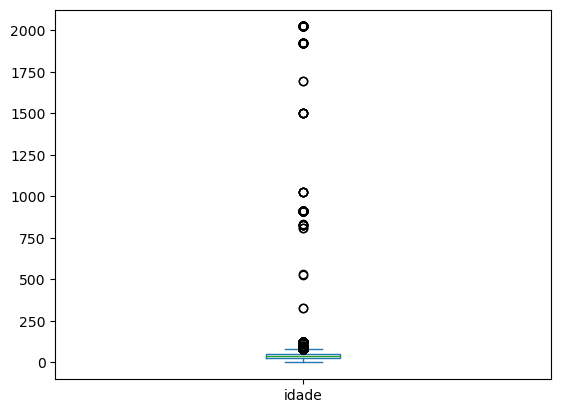

In [291]:
df_pre.idade.plot.box()

<Axes: >

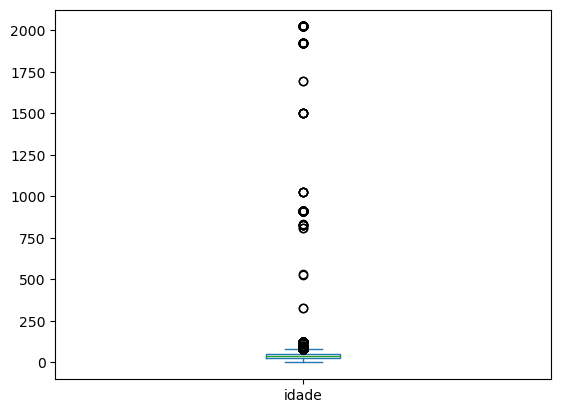

In [292]:
df.idade.plot.box()

In [293]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343412 entries, 0 to 343411
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      343412 non-null  float64
 1   pesid                   309888 non-null  float64
 2   data_inversa            343412 non-null  object 
 3   dia_semana              343412 non-null  object 
 4   horario                 343412 non-null  object 
 5   uf                      343412 non-null  object 
 6   br                      342588 non-null  float64
 7   km                      342588 non-null  object 
 8   municipio               343412 non-null  object 
 9   causa_principal         343412 non-null  object 
 10  causa_acidente          343412 non-null  object 
 11  ordem_tipo_acidente     343412 non-null  int64  
 12  tipo_acidente           343412 non-null  object 
 13  classificacao_acidente  343409 non-null  object 
 14  fase_dia            

<Axes: >

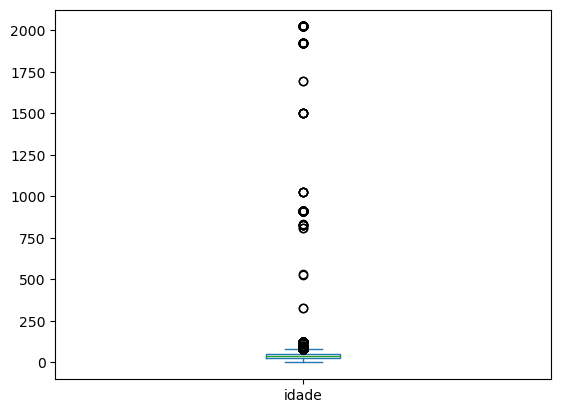

In [294]:
df.idade.plot.box()

In [295]:
df.columns


Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')

In [296]:
df[df.idade.isnull()]



,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
27,571782.0,1270940.0,2024-01-01,segunda-feira,01:50:00,MS,262.0,"4,3",TRES LAGOAS,Sim,Ausência de reação do condutor,2,Incêndio,Com Vítimas Feridas,Plena Noite,Crescente,Garoa/Chuvisco,Dupla,Reta,Sim,NaN,NaN,NA/NA,NaN,Testemunha,Não Informado,NaN,Não Informado,0.0,0.0,0.0,0.0,"-20,782074","-51,65705",SPRF-MS,DEL07-MS,UOP01-DEL07-MS
29,571782.0,1270940.0,2024-01-01,segunda-feira,01:50:00,MS,262.0,"4,3",TRES LAGOAS,Sim,Ausência de reação do condutor,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Garoa/Chuvisco,Dupla,Reta,Sim,NaN,NaN,NA/NA,NaN,Testemunha,Não Informado,NaN,Não Informado,0.0,0.0,0.0,0.0,"-20,782074","-51,65705",SPRF-MS,DEL07-MS,UOP01-DEL07-MS
50,571787.0,1268990.0,2024-01-01,segunda-feira,02:20:00,RS,116.0,242,SAO LEOPOLDO,Sim,Pedestre cruzava a pista fora da faixa,1,Atropelamento de Pedestre,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Reta;Em Obras,Sim,1018229.0,Automóvel,CHEV/ONIX JOY,0.0,Condutor,Não Informado,NaN,Não Informado,0.0,0.0,0.0,0.0,"-29,72297087","-51,14858729",SPRF-RS,DEL01-RS,UOP02-DEL01-RS
82,571789.0,NaN,2024-01-01,segunda-feira,03:56:00,ES,101.0,38,CONCEICAO DA BARRA,Sim,Ultrapassagem Indevida,1,Colisão lateral sentido oposto,NaN,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,1018244.0,Semireboque,SR/THERMOSUL SRBF 3E,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-18,48261","-39,92379",SPRF-ES,DEL04-ES,UOP02-DEL04-ES
86,571790.0,1271025.0,2024-01-01,segunda-feira,02:50:00,SP,101.0,41,UBATUBA,Sim,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Simples,Curva,Não,1018281.0,Automóvel,Não Informado/Não Informado,0.0,Condutor,Não Informado,NaN,Não Informado,0.0,0.0,0.0,0.0,"-23,41971433","-45,0428663",SPRF-SP,DEL06-SP,UOP01-DEL06-SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343387,621766.0,1392064.0,2024-07-28,domingo,09:30:00,PR,116.0,111,CURITIBA,Sim,Reação tardia ou ineficiente do condutor,1,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Dupla,Reta,Não,NaN,NaN,NA/NA,NaN,Testemunha,Não Informado,NaN,Não Informado,0.0,0.0,0.0,0.0,"-25,5579687","-49,268367",SPRF-PR,DEL01-PR,UOP07-DEL01-PR
343404,621812.0,1392087.0,2024-06-28,sexta-feira,07:10:00,SC,470.0,"54,1",BLUMENAU,Sim,Acesso irregular,1,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Sim,1114554.0,Motocicleta,HONDA/CG 150 SPORT,2008.0,Condutor,Lesões Graves,NaN,Feminino,0.0,0.0,1.0,0.0,"-26,871065","-49,110374",SPRF-SC,DEL04-SC,UOP01-DEL04-SC
343405,621812.0,1392084.0,2024-06-28,sexta-feira,07:10:00,SC,470.0,"54,1",BLUMENAU,Sim,Acesso irregular,1,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Sim,1114553.0,Automóvel,GM/CORSA HATCH MAXX,2011.0,Condutor,Ileso,NaN,Masculino,1.0,0.0,0.0,0.0,"-26,871065","-49,110374",SPRF-SC,DEL04-SC,UOP01-DEL04-SC
343406,621812.0,1392087.0,2024-06-28,sexta-feira,07:10:00,SC,470.0,"54,1",BLUMENAU,Não,Trafegar com motocicleta (ou similar) entre as...,1,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Sim,1114554.0,Motocicleta,HONDA/CG 150 SPORT,2008.0,Condutor,Lesões Graves,NaN,Feminino,0.0,0.0,1.0,0.0,"-26,871065","-49,110374",SPRF-SC,DEL04-SC,UOP01-DEL04-SC


In [297]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343412 entries, 0 to 343411
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      343412 non-null  float64
 1   pesid                   309888 non-null  float64
 2   data_inversa            343412 non-null  object 
 3   dia_semana              343412 non-null  object 
 4   horario                 343412 non-null  object 
 5   uf                      343412 non-null  object 
 6   br                      342588 non-null  float64
 7   km                      342588 non-null  object 
 8   municipio               343412 non-null  object 
 9   causa_principal         343412 non-null  object 
 10  causa_acidente          343412 non-null  object 
 11  ordem_tipo_acidente     343412 non-null  int64  
 12  tipo_acidente           343412 non-null  object 
 13  classificacao_acidente  343409 non-null  object 
 14  fase_dia            

In [298]:
df.uf


0         RJ
1         GO
2         GO
3         ES
4         SC
          ..
343407    SC
343408    AL
343409    AL
343410    AL
343411    AL
Name: uf, Length: 343412, dtype: object

In [299]:
print(df)


              id      pesid data_inversa     dia_semana   horario  uf     br  \
0       571772.0  1268971.0   2024-01-01  segunda-feira  00:05:00  RJ  101.0   
1       571774.0  1268985.0   2024-01-01  segunda-feira  00:05:00  GO  153.0   
2       571774.0  1268985.0   2024-01-01  segunda-feira  00:05:00  GO  153.0   
3       571777.0  1269020.0   2024-01-01  segunda-feira  01:45:00  ES  101.0   
4       571778.0  1269028.0   2024-01-01  segunda-feira  00:45:00  SC  101.0   
...          ...        ...          ...            ...       ...  ..    ...   
343407  621812.0  1392084.0   2024-06-28    sexta-feira  07:10:00  SC  470.0   
343408  621831.0  1392136.0   2024-07-28        domingo  11:30:00  AL  316.0   
343409  621831.0  1392135.0   2024-07-28        domingo  11:30:00  AL  316.0   
343410  621831.0  1392136.0   2024-07-28        domingo  11:30:00  AL  316.0   
343411  621831.0  1392135.0   2024-07-28        domingo  11:30:00  AL  316.0   

           km municipio causa_principal

In [300]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343412 entries, 0 to 343411
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      343412 non-null  float64
 1   pesid                   309888 non-null  float64
 2   data_inversa            343412 non-null  object 
 3   dia_semana              343412 non-null  object 
 4   horario                 343412 non-null  object 
 5   uf                      343412 non-null  object 
 6   br                      342588 non-null  float64
 7   km                      342588 non-null  object 
 8   municipio               343412 non-null  object 
 9   causa_principal         343412 non-null  object 
 10  causa_acidente          343412 non-null  object 
 11  ordem_tipo_acidente     343412 non-null  int64  
 12  tipo_acidente           343412 non-null  object 
 13  classificacao_acidente  343409 non-null  object 
 14  fase_dia            

In [301]:
df.head()



,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Sim,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1018215.0,Motocicleta,HONDA/CG 160 FAN,2023.0,Condutor,Óbito,26.0,Masculino,0.0,0.0,0.0,1.0,"-22,72935968","-42,70112512",SPRF-RJ,DEL02-RJ,UOP03-DEL02-RJ
1,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Não,Animais na Pista,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,1018226.0,Automóvel,VW/GOL 1.6 POWER,2009.0,Condutor,Ileso,34.0,Feminino,1.0,0.0,0.0,0.0,"-16,229185","-49,009797",SPRF-GO,DEL02-GO,UOP01-DEL02-GO
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Sim,Velocidade Incompatível,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,1018226.0,Automóvel,VW/GOL 1.6 POWER,2009.0,Condutor,Ileso,34.0,Feminino,1.0,0.0,0.0,0.0,"-16,229185","-49,009797",SPRF-GO,DEL02-GO,UOP01-DEL02-GO
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Sim,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Interseção de Vias;Reta,Sim,1018251.0,Caminhonete,VW/SAVEIRO 1.6,2009.0,Condutor,Ileso,55.0,Masculino,1.0,0.0,0.0,0.0,"-20,17292791","-40,26736384",SPRF-ES,DEL02-ES,UOP01-DEL02-ES
4,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Não,Reação tardia ou ineficiente do condutor,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,2011.0,Condutor,Ileso,53.0,Masculino,1.0,0.0,0.0,0.0,"-26,83477","-48,706151",SPRF-SC,DEL03-SC,UOP02-DEL03-SC


In [302]:
df.describe(include = 'all')

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
count,343412.000000,3.098880e+05,343412,343412,343412,343412,342588.000000,342588,343412,343412,343412,343412.000000,343412,343409,343412,343412,343412,343412,343412,343412,3.320510e+05,332051,343412,332051.000000,309888,309888,280129.000000,309888,309888.000000,309888.000000,309888.000000,309888.000000,343412,343412,343409,343336,343227
unique,NaN,NaN,213,7,1356,27,NaN,6583,1727,2,70,NaN,17,3,4,3,9,3,495,2,NaN,25,6061,NaN,5,5,NaN,4,NaN,NaN,NaN,NaN,24461,24455,28,152,392
top,NaN,NaN,2024-07-21,domingo,19:00:00,MG,NaN,5,BRASILIA,Sim,Reação tardia ou ineficiente do condutor,NaN,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Não,NaN,Automóvel,Não Informado/Não Informado,NaN,Condutor,Ileso,NaN,Masculino,NaN,NaN,NaN,NaN,"-23,01910606","-54,30128306",SPRF-MG,DEL01-PR,UOP01-DEL01-SC
freq,NaN,NaN,3200,57066,5298,44187,NaN,1466,5096,195461,50251,NaN,49376,253829,185867,188641,212228,188091,174251,209998,NaN,114639,14174,NaN,204357,126319,NaN,214593,NaN,NaN,NaN,NaN,960,960,44016,16407,5462
mean,595677.616076,1.327972e+06,NaN,NaN,NaN,NaN,216.686641,NaN,NaN,NaN,NaN,1.738137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.063764e+06,NaN,NaN,1903.986490,NaN,NaN,39.947696,NaN,0.407628,0.345957,0.127801,0.052287,NaN,NaN,NaN,NaN,NaN
std,13688.428005,3.328831e+04,NaN,NaN,NaN,NaN,126.744896,NaN,NaN,NaN,NaN,0.981022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.633828e+04,NaN,NaN,456.283085,NaN,NaN,41.979165,NaN,0.491394,0.475680,0.333869,0.222605,NaN,NaN,NaN,NaN,NaN
min,571772.000000,1.268971e+06,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.018215e+06,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,583348.000000,1.298572e+06,NaN,NaN,NaN,NaN,116.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.040193e+06,NaN,NaN,2008.000000,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,596061.000000,1.328496e+06,NaN,NaN,NaN,NaN,163.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.064232e+06,NaN,NaN,2013.000000,NaN,NaN,38.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,607592.000000,1.356871e+06,NaN,NaN,NaN,NaN,330.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.086743e+06,NaN,NaN,2020.000000,NaN,NaN,49.000000,NaN,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN


In [303]:
df.isnull().sum()

id                            0
pesid                     33524
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          824
km                          824
municipio                     0
causa_principal               0
causa_acidente                0
ordem_tipo_acidente           0
tipo_acidente                 0
classificacao_acidente        3
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                11361
tipo_veiculo              11361
marca                         0
ano_fabricacao_veiculo    11361
tipo_envolvido            33524
estado_fisico             33524
idade                     63283
sexo                      33524
ilesos                    33524
feridos_leves             33524
feridos_graves            33524
mortos  

In [304]:
df.columns


Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop'],
      dtype='object')

In [305]:
df['idade']

0         26.0
1         34.0
2         34.0
3         55.0
4         53.0
          ... 
343407     NaN
343408    34.0
343409    38.0
343410    34.0
343411    38.0
Name: idade, Length: 343412, dtype: float64

In [306]:
df['idade'].value_counts().tail(50)

idade
6.0       768
4.0       700
10.0      693
5.0       683
1.0       662
3.0       661
75.0      614
2.0       586
76.0      579
77.0      475
78.0      383
79.0      303
81.0      241
80.0      241
82.0      217
84.0      184
83.0      155
0.0       141
85.0      129
124.0     125
87.0      106
86.0       89
913.0      81
2023.0     58
90.0       55
89.0       45
88.0       40
1923.0     29
94.0       27
93.0       22
91.0       18
92.0        9
95.0        9
1505.0      6
96.0        6
830.0       6
1024.0      5
123.0       3
97.0        3
1692.0      2
812.0       2
1924.0      1
833.0       1
328.0       1
524.0       1
102.0       1
330.0       1
530.0       1
99.0        1
114.0       1
Name: count, dtype: int64

In [307]:
df.isna().sum()

id                            0
pesid                     33524
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          824
km                          824
municipio                     0
causa_principal               0
causa_acidente                0
ordem_tipo_acidente           0
tipo_acidente                 0
classificacao_acidente        3
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                11361
tipo_veiculo              11361
marca                         0
ano_fabricacao_veiculo    11361
tipo_envolvido            33524
estado_fisico             33524
idade                     63283
sexo                      33524
ilesos                    33524
feridos_leves             33524
feridos_graves            33524
mortos  

In [308]:
df.isna().sum().sum

<bound method Series.sum of id                            0
pesid                     33524
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          824
km                          824
municipio                     0
causa_principal               0
causa_acidente                0
ordem_tipo_acidente           0
tipo_acidente                 0
classificacao_acidente        3
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                11361
tipo_veiculo              11361
marca                         0
ano_fabricacao_veiculo    11361
tipo_envolvido            33524
estado_fisico             33524
idade                     63283
sexo                      33524
ilesos                    33524
feridos_leves             33524
feridos_grav

In [309]:
df.head(8)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Sim,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1018215.0,Motocicleta,HONDA/CG 160 FAN,2023.0,Condutor,Óbito,26.0,Masculino,0.0,0.0,0.0,1.0,"-22,72935968","-42,70112512",SPRF-RJ,DEL02-RJ,UOP03-DEL02-RJ
1,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Não,Animais na Pista,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,1018226.0,Automóvel,VW/GOL 1.6 POWER,2009.0,Condutor,Ileso,34.0,Feminino,1.0,0.0,0.0,0.0,"-16,229185","-49,009797",SPRF-GO,DEL02-GO,UOP01-DEL02-GO
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Sim,Velocidade Incompatível,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,1018226.0,Automóvel,VW/GOL 1.6 POWER,2009.0,Condutor,Ileso,34.0,Feminino,1.0,0.0,0.0,0.0,"-16,229185","-49,009797",SPRF-GO,DEL02-GO,UOP01-DEL02-GO
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Sim,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Interseção de Vias;Reta,Sim,1018251.0,Caminhonete,VW/SAVEIRO 1.6,2009.0,Condutor,Ileso,55.0,Masculino,1.0,0.0,0.0,0.0,"-20,17292791","-40,26736384",SPRF-ES,DEL02-ES,UOP01-DEL02-ES
4,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Não,Reação tardia ou ineficiente do condutor,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,2011.0,Condutor,Ileso,53.0,Masculino,1.0,0.0,0.0,0.0,"-26,83477","-48,706151",SPRF-SC,DEL03-SC,UOP02-DEL03-SC
5,571778.0,1269045.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Não,Reação tardia ou ineficiente do condutor,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,2011.0,Passageiro,Lesões Leves,33.0,Feminino,0.0,1.0,0.0,0.0,"-26,83477","-48,706151",SPRF-SC,DEL03-SC,UOP02-DEL03-SC
6,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Sim,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,2011.0,Condutor,Ileso,53.0,Masculino,1.0,0.0,0.0,0.0,"-26,83477","-48,706151",SPRF-SC,DEL03-SC,UOP02-DEL03-SC
7,571778.0,1269045.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Sim,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,2011.0,Passageiro,Lesões Leves,33.0,Feminino,0.0,1.0,0.0,0.0,"-26,83477","-48,706151",SPRF-SC,DEL03-SC,UOP02-DEL03-SC


In [310]:
#Percebi que o dataframe apresenta dados duplicados, por conta de apresentar mais de uma causa do acidente. 
#A causa principal é classificada como "SIM" e a secundária, coomo "NÃO
#Optei por deixar apenas a causa principal e, em seguida, eliminei esta coluna.
data = df[df['causa_principal'] != 'Não']

In [311]:
data.head(10)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Sim,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1018215.0,Motocicleta,HONDA/CG 160 FAN,2023.0,Condutor,Óbito,26.0,Masculino,0.0,0.0,0.0,1.0,"-22,72935968","-42,70112512",SPRF-RJ,DEL02-RJ,UOP03-DEL02-RJ
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Sim,Velocidade Incompatível,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,1018226.0,Automóvel,VW/GOL 1.6 POWER,2009.0,Condutor,Ileso,34.0,Feminino,1.0,0.0,0.0,0.0,"-16,229185","-49,009797",SPRF-GO,DEL02-GO,UOP01-DEL02-GO
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Sim,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Interseção de Vias;Reta,Sim,1018251.0,Caminhonete,VW/SAVEIRO 1.6,2009.0,Condutor,Ileso,55.0,Masculino,1.0,0.0,0.0,0.0,"-20,17292791","-40,26736384",SPRF-ES,DEL02-ES,UOP01-DEL02-ES
6,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Sim,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,2011.0,Condutor,Ileso,53.0,Masculino,1.0,0.0,0.0,0.0,"-26,83477","-48,706151",SPRF-SC,DEL03-SC,UOP02-DEL03-SC
7,571778.0,1269045.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Sim,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,2011.0,Passageiro,Lesões Leves,33.0,Feminino,0.0,1.0,0.0,0.0,"-26,83477","-48,706151",SPRF-SC,DEL03-SC,UOP02-DEL03-SC
8,571779.0,1268998.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Sim,Ausência de reação do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,2010.0,Passageiro,Ileso,6.0,Feminino,1.0,0.0,0.0,0.0,"-29,66938502","-51,14304731",SPRF-RS,DEL01-RS,UOP02-DEL01-RS
9,571779.0,1268999.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Sim,Ausência de reação do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,2010.0,Passageiro,Ileso,9.0,Masculino,1.0,0.0,0.0,0.0,"-29,66938502","-51,14304731",SPRF-RS,DEL01-RS,UOP02-DEL01-RS
10,571779.0,1269000.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Sim,Ausência de reação do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,2010.0,Passageiro,Ileso,13.0,Feminino,1.0,0.0,0.0,0.0,"-29,66938502","-51,14304731",SPRF-RS,DEL01-RS,UOP02-DEL01-RS
11,571779.0,1268976.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Sim,Ausência de reação do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,2010.0,Condutor,Ileso,42.0,Masculino,1.0,0.0,0.0,0.0,"-29,66938502","-51,14304731",SPRF-RS,DEL01-RS,UOP02-DEL01-RS
16,571780.0,1271043.0,2024-01-01,segunda-feira,01:50:00,PR,277.0,70,SAO JOSE DOS PINHAIS,Sim,Ausência de reação do condutor,2,Queda de ocupante de veículo,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Curva,Não,1018220.0,Motocicleta,HONDA/CG 125 FAN KS,2009.0,Passageiro,Lesões Leves,32.0,Feminino,0.0,1.0,0.0,0.0,"-25,54112281","-49,06183391",S

In [312]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195461 entries, 0 to 343411
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      195461 non-null  float64
 1   pesid                   177438 non-null  float64
 2   data_inversa            195461 non-null  object 
 3   dia_semana              195461 non-null  object 
 4   horario                 195461 non-null  object 
 5   uf                      195461 non-null  object 
 6   br                      195018 non-null  float64
 7   km                      195018 non-null  object 
 8   municipio               195461 non-null  object 
 9   causa_principal         195461 non-null  object 
 10  causa_acidente          195461 non-null  object 
 11  ordem_tipo_acidente     195461 non-null  int64  
 12  tipo_acidente           195461 non-null  object 
 13  classificacao_acidente  195458 non-null  object 
 14  fase_dia                1

In [313]:
data.isna().sum().sum

<bound method Series.sum of id                            0
pesid                     18023
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          443
km                          443
municipio                     0
causa_principal               0
causa_acidente                0
ordem_tipo_acidente           0
tipo_acidente                 0
classificacao_acidente        3
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                 6042
tipo_veiculo               6042
marca                         0
ano_fabricacao_veiculo     6042
tipo_envolvido            18023
estado_fisico             18023
idade                     34882
sexo                      18023
ilesos                    18023
feridos_leves             18023
feridos_grav

In [314]:
#Exclui as coluna que não acho importante para a análise que vamos fazer
data.drop(['causa_principal', 'ano_fabricacao_veiculo', 'feridos_leves', 'feridos_graves','mortos', 'regional', 'delegacia', 'uop'], axis = 1, inplace = True)

C:\Users\leand\AppData\Local\Temp\ipykernel_18656\2831587860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['causa_principal', 'ano_fabricacao_veiculo', 'feridos_leves', 'feridos_graves','mortos', 'regional', 'delegacia', 'uop'], axis = 1, inplace = True)


In [315]:
#Percebi que os dados faltantes estavam diretamente relacionados a testemunhas, inclusas no dados.
#Acredito que essa informação não seja tão relevante para a nossa análise de dados.
data1 = data[data['tipo_envolvido'] != 'Testemunha']

In [316]:
data1.isna().sum().sum

<bound method Series.sum of id                            0
pesid                     18023
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          432
km                          432
municipio                     0
causa_acidente                0
ordem_tipo_acidente           0
tipo_acidente                 0
classificacao_acidente        3
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                 2622
tipo_veiculo               2622
marca                         0
tipo_envolvido            18023
estado_fisico             18023
idade                     31462
sexo                      18023
ilesos                    18023
latitude                      0
longitude                     0
dtype: int64>

In [317]:
data1.head(10)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,ilesos,latitude,longitude
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1018215.0,Motocicleta,HONDA/CG 160 FAN,Condutor,Óbito,26.0,Masculino,0.0,"-22,72935968","-42,70112512"
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Velocidade Incompatível,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,1018226.0,Automóvel,VW/GOL 1.6 POWER,Condutor,Ileso,34.0,Feminino,1.0,"-16,229185","-49,009797"
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Interseção de Vias;Reta,Sim,1018251.0,Caminhonete,VW/SAVEIRO 1.6,Condutor,Ileso,55.0,Masculino,1.0,"-20,17292791","-40,26736384"
6,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Condutor,Ileso,53.0,Masculino,1.0,"-26,83477","-48,706151"
7,571778.0,1269045.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Passageiro,Lesões Leves,33.0,Feminino,0.0,"-26,83477","-48,706151"
8,571779.0,1268998.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Passageiro,Ileso,6.0,Feminino,1.0,"-29,66938502","-51,14304731"
9,571779.0,1268999.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Passageiro,Ileso,9.0,Masculino,1.0,"-29,66938502","-51,14304731"
10,571779.0,1269000.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Passageiro,Ileso,13.0,Feminino,1.0,"-29,66938502","-51,14304731"
11,571779.0,1268976.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Condutor,Ileso,42.0,Masculino,1.0,"-29,66938502","-51,14304731"
16,571780.0,1271043.0,2024-01-01,segunda-feira,01:50:00,PR,277.0,70,SAO JOSE DOS PINHAIS,Ausência de reação do condutor,2,Queda de ocupante de veículo,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Curva,Não,1018220.0,Motocicleta,HONDA/CG 125 FAN KS,Passageiro,Lesões Leves,32.0,Feminino,0.0,"-25,54112281","-49,06183391"


In [318]:
data1.drop('ilesos', axis = 1, inplace = True)

C:\Users\leand\AppData\Local\Temp\ipykernel_18656\915510698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop('ilesos', axis = 1, inplace = True)


In [319]:
data1.isna().sum().sum

<bound method Series.sum of id                            0
pesid                     18023
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          432
km                          432
municipio                     0
causa_acidente                0
ordem_tipo_acidente           0
tipo_acidente                 0
classificacao_acidente        3
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                 2622
tipo_veiculo               2622
marca                         0
tipo_envolvido            18023
estado_fisico             18023
idade                     31462
sexo                      18023
latitude                      0
longitude                     0
dtype: int64>

In [320]:
linha = data1[data1.isnull().any(axis=1)]

In [321]:
print(linha)

              id      pesid data_inversa     dia_semana   horario  uf     br  \
50      571787.0  1268990.0   2024-01-01  segunda-feira  02:20:00  RS  116.0   
51      571787.0  1268989.0   2024-01-01  segunda-feira  02:20:00  RS  116.0   
82      571789.0        NaN   2024-01-01  segunda-feira  03:56:00  ES  101.0   
83      571789.0  1269011.0   2024-01-01  segunda-feira  03:56:00  ES  101.0   
84      571789.0  1271676.0   2024-01-01  segunda-feira  03:56:00  ES  101.0   
...          ...        ...          ...            ...       ...  ..    ...   
343383  621766.0  1391974.0   2024-07-28        domingo  09:30:00  PR  116.0   
343385  621766.0  1392065.0   2024-07-28        domingo  09:30:00  PR  116.0   
343386  621766.0  1391974.0   2024-07-28        domingo  09:30:00  PR  116.0   
343404  621812.0  1392087.0   2024-06-28    sexta-feira  07:10:00  SC  470.0   
343405  621812.0  1392084.0   2024-06-28    sexta-feira  07:10:00  SC  470.0   

          km           municipio       

In [322]:
data1['tipo_veiculo'].value_counts()

tipo_veiculo
Automóvel            66328
Motocicleta          41139
Semireboque          16000
Caminhonete          15551
Caminhão-trator      13498
Caminhão             10948
Ônibus                7350
Camioneta             4918
Motoneta              4393
Utilitário            3146
Bicicleta             2104
Reboque               1752
Micro-ônibus          1320
Ciclomotor             418
Outros                 358
Trator de rodas         74
Carroça-charrete        59
Triciclo                21
Motor-casa              18
Trator de esteira        9
Quadriciclo              4
Trem-bonde               3
Trator misto             3
Carro de mão             3
Chassi-plataforma        2
Name: count, dtype: int64

In [323]:
#Percebi que os dados faltantes estavam diretamente relacionados a semireboque (dados referente ao caminhão-trator envolvido no acidente), inclusas no dados.
#Acredito que essa informação não seja tão relevante para a nossa análise de dados.
data2 = data1[data1['tipo_veiculo'] != 'Semireboque']

In [324]:
data1.isna().sum().sum

<bound method Series.sum of id                            0
pesid                     18023
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          432
km                          432
municipio                     0
causa_acidente                0
ordem_tipo_acidente           0
tipo_acidente                 0
classificacao_acidente        3
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                 2622
tipo_veiculo               2622
marca                         0
tipo_envolvido            18023
estado_fisico             18023
idade                     31462
sexo                      18023
latitude                      0
longitude                     0
dtype: int64>

In [325]:
data2['tipo_veiculo']

0         Motocicleta
2           Automóvel
3         Caminhonete
6           Camioneta
7           Camioneta
             ...     
343403    Motocicleta
343404    Motocicleta
343405      Automóvel
343410    Motocicleta
343411    Motocicleta
Name: tipo_veiculo, Length: 176041, dtype: object

In [326]:
data2.loc[385:420]

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
385,571838.0,1269159.0,2024-01-01,segunda-feira,05:00:00,MT,364.0,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,2,Capotamento,Sem Vítimas,Pleno dia,Crescente,Céu Claro,Dupla,Reta,Não,1018348.0,Caminhão,SCANIA/P 310 B8X2,Condutor,Ileso,57.0,Masculino,"-16,17914141","-54,78905337"
386,571838.0,NaN,2024-01-01,segunda-feira,05:00:00,MT,364.0,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,2,Capotamento,Sem Vítimas,Pleno dia,Crescente,Céu Claro,Dupla,Reta,Não,1018349.0,Reboque,R/TOREZAN 2E,NaN,NaN,NaN,NaN,"-16,17914141","-54,78905337"
387,571838.0,1269158.0,2024-01-01,segunda-feira,05:00:00,MT,364.0,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,2,Capotamento,Sem Vítimas,Pleno dia,Crescente,Céu Claro,Dupla,Reta,Não,1018347.0,Automóvel,VW/GOL 1.0,Condutor,Ileso,23.0,Masculino,"-16,17914141","-54,78905337"
391,571838.0,1269159.0,2024-01-01,segunda-feira,05:00:00,MT,364.0,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,1,Colisão traseira,Sem Vítimas,Pleno dia,Crescente,Céu Claro,Dupla,Reta,Não,1018348.0,Caminhão,SCANIA/P 310 B8X2,Condutor,Ileso,57.0,Masculino,"-16,17914141","-54,78905337"
392,571838.0,NaN,2024-01-01,segunda-feira,05:00:00,MT,364.0,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,1,Colisão traseira,Sem Vítimas,Pleno dia,Crescente,Céu Claro,Dupla,Reta,Não,1018349.0,Reboque,R/TOREZAN 2E,NaN,NaN,NaN,NaN,"-16,17914141","-54,78905337"
393,571838.0,1269158.0,2024-01-01,segunda-feira,05:00:00,MT,364.0,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,1,Colisão traseira,Sem Vítimas,Pleno dia,Crescente,Céu Claro,Dupla,Reta,Não,1018347.0,Automóvel,VW/GOL 1.0,Condutor,Ileso,23.0,Masculino,"-16,17914141","-54,78905337"
396,571839.0,1269152.0,2024-01-01,segunda-feira,09:15:00,MG,381.0,521,BRUMADINHO,Velocidade Incompatível,2,Queda de ocupante de veículo,Com Vítimas Feridas,Pleno dia,Crescente,Chuva,Dupla,Declive;Curva,Não,1018345.0,Motocicleta,Não Informado/Não Informado,Condutor,Lesões Leves,32.0,Masculino,"-20,13846621","-44,31715274"
399,571839.0,1269152.0,2024-01-01,segunda-feira,09:15:00,MG,381.0,521,BRUMADINHO,Velocidade Incompatível,1,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Crescente,Chuva,Dupla,Declive;Curva,Não,1018345.0,Motocicleta,Não Informado/Não Informado,Condutor,Lesões Leves,32.0,Masculino,"-20,13846621","-44,31715274"
400,571841.0,1269091.0,2024-01-01,segunda-feira,08:50:00,CE,304.0,"50,7",ARACATI,Chuva,1,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Decrescente,Garoa/Chuvisco,Simples,Reta,Não,1018307.0,Utilitário,CHEV/TRAILBLAZER PRE D4A,Condutor,Lesões Leves,53.0,Masculino,"-4,57352926","-37,76245988"
401,571842.0,1269097.0,2024-01-01,segunda-feira,05:20:00,TO,153.0,789,TALISMA,Reação tardia ou ineficiente do condutor,1,Saída de leito carroçável,Com Vítimas Feridas,Amanhecer,Decrescente,Céu Claro,Simples,Reta,Não,1018310.0,Automóvel,I/CHEVROLET CLASSIC LS,Condutor,Ileso,31.0,Feminino,"-12,71914102","-49,07691189"


In [327]:
data2.loc[data2['tipo_veiculo'] == 'Reboque']

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
386,571838.0,NaN,2024-01-01,segunda-feira,05:00:00,MT,364.0,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,2,Capotamento,Sem Vítimas,Pleno dia,Crescente,Céu Claro,Dupla,Reta,Não,1018349.0,Reboque,R/TOREZAN 2E,NaN,NaN,NaN,NaN,"-16,17914141","-54,78905337"
392,571838.0,NaN,2024-01-01,segunda-feira,05:00:00,MT,364.0,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,1,Colisão traseira,Sem Vítimas,Pleno dia,Crescente,Céu Claro,Dupla,Reta,Não,1018349.0,Reboque,R/TOREZAN 2E,NaN,NaN,NaN,NaN,"-16,17914141","-54,78905337"
968,571922.0,NaN,2024-01-01,segunda-feira,15:30:00,MG,251.0,"459,7",GRAO MOGOL,Condutor Dormindo,1,Colisão frontal,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,1018496.0,Reboque,R/RANDON RE DL,NaN,NaN,NaN,NaN,"-16,41473399","-43,368613"
1977,572060.0,NaN,2024-01-01,segunda-feira,17:30:00,BA,242.0,366,PALMEIRAS,Velocidade Incompatível,2,Tombamento,Sem Vítimas,Anoitecer,Decrescente,Chuva,Simples,Reta;Ponte,Não,1019881.0,Reboque,REB/LENCOIS RRTC,NaN,NaN,NaN,NaN,"-12,46767097","-41,43877801"
1985,572060.0,NaN,2024-01-01,segunda-feira,17:30:00,BA,242.0,366,PALMEIRAS,Velocidade Incompatível,1,Colisão com objeto,Sem Vítimas,Anoitecer,Decrescente,Chuva,Simples,Reta;Ponte,Não,1019881.0,Reboque,REB/LENCOIS RRTC,NaN,NaN,NaN,NaN,"-12,46767097","-41,43877801"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342572,620513.0,NaN,2024-07-30,terça-feira,12:50:00,SP,381.0,"41,5",ATIBAIA,Demais falhas mecânicas ou elétricas,1,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Múltipla,Reta,Sim,1111935.0,Reboque,R/ISIDOC CIA 1502,NaN,NaN,NaN,NaN,"-23,13863999","-46,57584088"
342715,620852.0,NaN,2024-07-11,quinta-feira,07:05:00,MA,10.0,"256,6",IMPERATRIZ,Acessar a via sem observar a presença dos outr...,3,Queda de ocupante de veículo,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Sim,1112587.0,Reboque,R/RANDON RE DL,NaN,NaN,NaN,NaN,"-5,499715","-47,471836"
342733,620852.0,NaN,2024-07-11,quinta-feira,07:05:00,MA,10.0,"256,6",IMPERATRIZ,Acessar a via sem observar a presença dos outr...,2,Tombamento,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Sim,1112587.0,Reboque,R/RANDON RE DL,NaN,NaN,NaN,NaN,"-5,499715","-47,471836"
342751,620852.0,NaN,2024-07-11,quinta-feira,07:05:00,MA,10.0,"256,6",IMPERATRIZ,Acessar a via sem observar a presença dos outr...,1,Colisão lateral mesmo sentido,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Sim,1112587.0,Reboque,R/RANDON RE DL,NaN,NaN,NaN,NaN,"-5,499715","-47,471836"


In [328]:
#Percebi que os dados faltantes estavam diretamente relacionados a reboque (dados referente ao caminhão envolvido no acidente), inclusas no dados.
#Acredito que essa informação não seja tão relevante para a nossa análise de dados.
data3 = data2[data2['tipo_veiculo'] != 'Reboque']

In [329]:
data3.isna().sum().sum

<bound method Series.sum of id                            0
pesid                       376
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          417
km                          417
municipio                     0
causa_acidente                0
ordem_tipo_acidente           0
tipo_acidente                 0
classificacao_acidente        2
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                 2622
tipo_veiculo               2622
marca                         0
tipo_envolvido              376
estado_fisico               376
idade                     13746
sexo                        376
latitude                      0
longitude                     0
dtype: int64>

In [330]:
data3['tipo_veiculo'].value_counts()

tipo_veiculo
Automóvel            66328
Motocicleta          41139
Caminhonete          15551
Caminhão-trator      13498
Caminhão             10948
Ônibus                7350
Camioneta             4918
Motoneta              4393
Utilitário            3146
Bicicleta             2104
Micro-ônibus          1320
Ciclomotor             418
Outros                 358
Trator de rodas         74
Carroça-charrete        59
Triciclo                21
Motor-casa              18
Trator de esteira        9
Quadriciclo              4
Trem-bonde               3
Trator misto             3
Carro de mão             3
Chassi-plataforma        2
Name: count, dtype: int64

In [331]:
data3.loc[data2['tipo_veiculo'] == 'Outros']

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
2173,572083.0,1270836.0,2024-01-02,terça-feira,09:01:00,PE,104.0,"82,7",AGRESTINA,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Sem Vítimas,Pleno dia,Crescente,Céu Claro,Simples,Reta;Ponte,Não,1019422.0,Outros,Não Informado/Não Informado,Condutor,Não Informado,NaN,Não Informado,"-8,414513","-35,967102"
4823,572416.0,1270883.0,2024-01-03,quarta-feira,16:45:00,GO,40.0,24,LUZIANIA,Condutor deixou de manter distância do veículo...,2,Tombamento,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Dupla,Interseção de Vias,Não,1019425.0,Outros,Não Informado/Não Informado,Condutor,Não Informado,NaN,Não Informado,"-16,252738","-47,900437"
4825,572416.0,1270883.0,2024-01-03,quarta-feira,16:45:00,GO,40.0,24,LUZIANIA,Condutor deixou de manter distância do veículo...,1,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Dupla,Interseção de Vias,Não,1019425.0,Outros,Não Informado/Não Informado,Condutor,Não Informado,NaN,Não Informado,"-16,252738","-47,900437"
6930,572702.0,1273339.0,2024-01-05,sexta-feira,07:40:00,ES,101.0,"278,9",SERRA,Reação tardia ou ineficiente do condutor,1,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Dupla,Reta,Não,1021098.0,Outros,Não Informado/Não Informado,Condutor,Não Informado,NaN,Não Informado,"-20,21698365","-40,32974606"
10644,573223.0,1272963.0,2024-01-07,domingo,19:40:00,PA,230.0,107,SAO JOAO DO ARAGUAIA,Reação tardia ou ineficiente do condutor,3,Queda de ocupante de veículo,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Reta,Não,1020865.0,Outros,Não Informado/Não Informado,Condutor,Não Informado,NaN,Não Informado,"-5,42984186","-48,93289947"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337887,617760.0,1383919.0,2024-07-29,segunda-feira,19:00:00,RJ,356.0,127,CAMPOS DOS GOYTACAZES,Pedestre andava na pista,1,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,1106604.0,Outros,Não Informado/Não Informado,Condutor,Não Informado,NaN,Não Informado,"-21,67225879","-41,36006689"
338714,617882.0,1382630.0,2024-07-30,terça-feira,12:40:00,MS,158.0,277,TRES LAGOAS,Ausência de reação do condutor,1,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Curva,Sim,1106884.0,Outros,Não Informado/Não Informado,Condutor,Não Informado,NaN,Não Informado,"-20,81991691","-51,70965204"
341566,618261.0,1383321.0,2024-07-17,quarta-feira,22:15:00,SC,101.0,"12,4",GARUVA,Ausência de reação do condutor,3,Colisão lateral mesmo sentido,Com Vítimas Feridas,Plena Noite,Decrescente,Nevoeiro/Neblina,Dupla,Reta;Declive,Não,1107550.0,Outros,Não Informado/Não Informado,Condutor,Não Informado,NaN,Não Informado,"-26,08104399","-48,86175612"
341574,618261.0,1383321.0,2024-07-17,quarta-feira,22:15:00,SC,101.0,"12,4",GARUVA,Ausência de reação do condutor,2,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Nevoeiro/Neblina,Dupla,Reta;Declive,Não,1107550.0,Outros,Não Informado/Não Informado,Condutor,Não Informado,NaN,Não Informado,"-26,08104399","-48,86175612"


In [332]:
data2.loc[4823:4835]

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
4823,572416.0,1270883.0,2024-01-03,quarta-feira,16:45:00,GO,40.0,24,LUZIANIA,Condutor deixou de manter distância do veículo...,2,Tombamento,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Dupla,Interseção de Vias,Não,1019425.0,Outros,Não Informado/Não Informado,Condutor,Não Informado,NaN,Não Informado,"-16,252738","-47,900437"
4824,572416.0,1270842.0,2024-01-03,quarta-feira,16:45:00,GO,40.0,24,LUZIANIA,Condutor deixou de manter distância do veículo...,2,Tombamento,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Dupla,Interseção de Vias,Não,1019426.0,Motocicleta,HONDA/CG 160 FAN,Condutor,Lesões Leves,41.0,Feminino,"-16,252738","-47,900437"
4825,572416.0,1270883.0,2024-01-03,quarta-feira,16:45:00,GO,40.0,24,LUZIANIA,Condutor deixou de manter distância do veículo...,1,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Dupla,Interseção de Vias,Não,1019425.0,Outros,Não Informado/Não Informado,Condutor,Não Informado,NaN,Não Informado,"-16,252738","-47,900437"
4826,572416.0,1270842.0,2024-01-03,quarta-feira,16:45:00,GO,40.0,24,LUZIANIA,Condutor deixou de manter distância do veículo...,1,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Dupla,Interseção de Vias,Não,1019426.0,Motocicleta,HONDA/CG 160 FAN,Condutor,Lesões Leves,41.0,Feminino,"-16,252738","-47,900437"


In [333]:
data3.loc[data2['tipo_veiculo'] == 'Utilitário']

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
400,571841.0,1269091.0,2024-01-01,segunda-feira,08:50:00,CE,304.0,"50,7",ARACATI,Chuva,1,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Decrescente,Garoa/Chuvisco,Simples,Reta,Não,1018307.0,Utilitário,CHEV/TRAILBLAZER PRE D4A,Condutor,Lesões Leves,53.0,Masculino,"-4,57352926","-37,76245988"
451,571851.0,1269164.0,2024-01-01,segunda-feira,11:00:00,PE,101.0,58,RECIFE,Acesso irregular,1,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Nublado,Dupla,Reta,Sim,1018334.0,Utilitário,I/TOYOTA HILUX SWSRXA4FD,Condutor,Ileso,28.0,Masculino,"-7,97063209","-34,92064675"
488,571858.0,1269175.0,2024-01-01,segunda-feira,10:55:00,SC,101.0,113,ITAJAI,Condutor deixou de manter distância do veículo...,1,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Múltipla,Reta,Não,1018364.0,Utilitário,I/MMC PAJERO HPE 3.2 D,Condutor,Ileso,36.0,Masculino,"-26,85311393","-48,72689927"
682,571882.0,1269245.0,2024-01-01,segunda-feira,12:50:00,MG,381.0,"453,8",SABARA,Ausência de reação do condutor,1,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Nublado,Simples,Reta,Sim,1018408.0,Utilitário,I/SUZUKI G.VITARA 2WD 5P,Condutor,Ileso,63.0,Masculino,"-19,84161029","-43,86768401"
1415,571978.0,1269473.0,2024-01-01,segunda-feira,20:00:00,SP,116.0,230,SAO PAULO,Trafegar com motocicleta (ou similar) entre as...,2,Tombamento,Com Vítimas Feridas,Plena Noite,Crescente,Ignorado,Múltipla,Em Obras;Reta;Interseção de Vias,Sim,1018555.0,Utilitário,MMC/ECLIPSE CR HPES,Condutor,Ileso,77.0,Masculino,"-23,52251783","-46,5855702"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342600,620760.0,1389374.0,2024-06-27,quinta-feira,18:15:00,PI,NaN,NaN,SAO JOAO DO PIAUI,Animais na Pista,1,Atropelamento de Animal,Sem Vítimas,Plena Noite,Não Informado,Céu Claro,Simples,Reta,Não,1112354.0,Utilitário,CHEV/TRAILBLAZER LT D4A,Condutor,Ileso,45.0,Masculino,"-8,26381651","-42,4092865"
343178,621327.0,1390919.0,2024-05-31,sexta-feira,12:15:00,RJ,101.0,"479,9",ANGRA DOS REIS,Acessar a via sem observar a presença dos outr...,1,Colisão transversal,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Não,1113637.0,Utilitário,I/LR R.ROVER SPORT TDV6,Condutor,Ileso,23.0,Feminino,"-23,01098576","-44,27880948"
343211,621506.0,1391380.0,2024-04-08,segunda-feira,12:30:00,PR,376.0,"176,3",MARINGA,Acessar a via sem observar a presença dos outr...,3,Queda de ocupante de veículo,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Múltipla,Reta,Sim,1113996.0,Utilitário,I/MMC OUTLANDER 2.0 HPE,Condutor,Não Informado,NaN,Não Informado,"-23,41269173","-51,93158327"
343213,621506.0,1391380.0,2024-04-08,segunda-feira,12:30:00,PR,376.0,"176,3",MARINGA,Acessar a via sem observar a presença dos outr...,2,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Múltipla,Reta,Sim,1113996.0,Utilitário,I/MMC OUTLANDER 2.0 HPE,Condutor,Não Informado,NaN,Não Informado,"-23,41269173","-51,93158327"


In [334]:
data3.loc[data2['idade'] > 100]

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
325,571827.0,1269078.0,2024-01-01,segunda-feira,07:50:00,RJ,356.0,168,CAMPOS DOS GOYTACAZES,Condutor Dormindo,1,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Simples,Reta,Não,1018294.0,Automóvel,FIAT/UNO MILLE WAY ECON,Passageiro,Lesões Leves,2023.0,Masculino,"-21,715032","-41,130438"
1738,572029.0,1269675.0,2024-01-02,terça-feira,03:30:00,GO,153.0,356,JARAGUA,Ausência de reação do condutor,1,Colisão transversal,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Reta,Sim,1018672.0,Automóvel,HONDA/CITY DX FLEX,Passageiro,Lesões Leves,1923.0,Masculino,"-15,716531","-49,329445"
2088,572077.0,1269715.0,2024-01-02,terça-feira,08:30:00,AL,104.0,93,RIO LARGO,Área urbana sem a presença de local apropriado...,3,Tombamento,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Dupla,Reta,Sim,NaN,NaN,NA/NA,Pedestre,Lesões Leves,830.0,Masculino,"-9,52891696","-35,79807693"
2098,572077.0,1269715.0,2024-01-02,terça-feira,08:30:00,AL,104.0,93,RIO LARGO,Área urbana sem a presença de local apropriado...,2,Atropelamento de Pedestre,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Dupla,Reta,Sim,NaN,NaN,NA/NA,Pedestre,Lesões Leves,830.0,Masculino,"-9,52891696","-35,79807693"
2108,572077.0,1269715.0,2024-01-02,terça-feira,08:30:00,AL,104.0,93,RIO LARGO,Área urbana sem a presença de local apropriado...,1,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Dupla,Reta,Sim,NaN,NaN,NA/NA,Pedestre,Lesões Leves,830.0,Masculino,"-9,52891696","-35,79807693"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317474,615399.0,1376500.0,2024-07-19,sexta-feira,04:15:00,BA,101.0,"825,2",PRADO,Velocidade Incompatível,1,Tombamento,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Curva,Não,1101785.0,Micro-ônibus,RENAULT/MASTER MBUS L3H2,Passageiro,Lesões Leves,2023.0,Masculino,"-17,149908","-39,567032"
320726,615855.0,1376923.0,2024-07-20,sábado,23:30:00,BA,116.0,595,NOVA ITARANA,Trafegar com motocicleta (ou similar) entre as...,1,Colisão transversal,Com Vítimas Feridas,Plena Noite,Decrescente,Garoa/Chuvisco,Simples,Reta,Não,1102663.0,Motocicleta,HONDA/CG150 START,Passageiro,Lesões Leves,812.0,Masculino,"-13,17351892","-39,99933014"
320727,615855.0,1376922.0,2024-07-20,sábado,23:30:00,BA,116.0,595,NOVA ITARANA,Trafegar com motocicleta (ou similar) entre as...,1,Colisão transversal,Com Vítimas Feridas,Plena Noite,Decrescente,Garoa/Chuvisco,Simples,Reta,Não,1102663.0,Motocicleta,HONDA/CG150 START,Condutor,Lesões Leves,812.0,Masculino,"-13,17351892","-39,99933014"
323365,616033.0,1377471.0,2024-07-21,domingo,17:40:00,AL,316.0,"250,6",ATALAIA,Ingestão de álcool pelo condutor,1,Tombamento,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Reta,Não,1103017.0,Motoneta,I/WUYANG WY48Q-2,Condutor,Lesões Leves,2023.0,Masculino,"-9,55605726","-35,97591943"


In [335]:
data3.loc[320:330]

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
320,571826.0,1269374.0,2024-01-01,segunda-feira,08:00:00,PR,376.0,617,SAO JOSE DOS PINHAIS,Ausência de reação do condutor,1,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Dupla,Reta,Sim,1018484.0,Motocicleta,HONDA/CG 160 START,Passageiro,Lesões Graves,21.0,Feminino,"-25,58426494","-49,17618795"
321,571826.0,1270996.0,2024-01-01,segunda-feira,08:00:00,PR,376.0,617,SAO JOSE DOS PINHAIS,Ausência de reação do condutor,1,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Dupla,Reta,Sim,1018483.0,Automóvel,Não Informado/Não Informado,Condutor,Não Informado,NaN,Não Informado,"-25,58426494","-49,17618795"
325,571827.0,1269078.0,2024-01-01,segunda-feira,07:50:00,RJ,356.0,168,CAMPOS DOS GOYTACAZES,Condutor Dormindo,1,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Simples,Reta,Não,1018294.0,Automóvel,FIAT/UNO MILLE WAY ECON,Passageiro,Lesões Leves,2023.0,Masculino,"-21,715032","-41,130438"
326,571827.0,1269077.0,2024-01-01,segunda-feira,07:50:00,RJ,356.0,168,CAMPOS DOS GOYTACAZES,Condutor Dormindo,1,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Simples,Reta,Não,1018294.0,Automóvel,FIAT/UNO MILLE WAY ECON,Condutor,Lesões Leves,31.0,Masculino,"-21,715032","-41,130438"
327,571827.0,1269080.0,2024-01-01,segunda-feira,07:50:00,RJ,356.0,168,CAMPOS DOS GOYTACAZES,Condutor Dormindo,1,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Nublado,Simples,Reta,Não,1018295.0,Automóvel,NISSAN/VERSA 16 SV,Condutor,Ileso,22.0,Masculino,"-21,715032","-41,130438"
330,571828.0,1269070.0,2024-01-01,segunda-feira,06:20:00,PR,373.0,273,PRUDENTOPOLIS,Ingestão de álcool pelo condutor,2,Queda de ocupante de veículo,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Não,1018285.0,Motocicleta,HONDA/CG 150 TITAN EX,Passageiro,Lesões Leves,19.0,Feminino,"-25,24741013","-51,05082693"


In [336]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174289 entries, 0 to 343411
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      174289 non-null  float64
 1   pesid                   173913 non-null  float64
 2   data_inversa            174289 non-null  object 
 3   dia_semana              174289 non-null  object 
 4   horario                 174289 non-null  object 
 5   uf                      174289 non-null  object 
 6   br                      173872 non-null  float64
 7   km                      173872 non-null  object 
 8   municipio               174289 non-null  object 
 9   causa_acidente          174289 non-null  object 
 10  ordem_tipo_acidente     174289 non-null  int64  
 11  tipo_acidente           174289 non-null  object 
 12  classificacao_acidente  174287 non-null  object 
 13  fase_dia                174289 non-null  object 
 14  sentido_via             1

In [337]:
data3.loc[8:11]

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
8,571779.0,1268998.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Passageiro,Ileso,6.0,Feminino,"-29,66938502","-51,14304731"
9,571779.0,1268999.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Passageiro,Ileso,9.0,Masculino,"-29,66938502","-51,14304731"
10,571779.0,1269000.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Passageiro,Ileso,13.0,Feminino,"-29,66938502","-51,14304731"
11,571779.0,1268976.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Condutor,Ileso,42.0,Masculino,"-29,66938502","-51,14304731"


In [338]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174289 entries, 0 to 343411
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      174289 non-null  float64
 1   pesid                   173913 non-null  float64
 2   data_inversa            174289 non-null  object 
 3   dia_semana              174289 non-null  object 
 4   horario                 174289 non-null  object 
 5   uf                      174289 non-null  object 
 6   br                      173872 non-null  float64
 7   km                      173872 non-null  object 
 8   municipio               174289 non-null  object 
 9   causa_acidente          174289 non-null  object 
 10  ordem_tipo_acidente     174289 non-null  int64  
 11  tipo_acidente           174289 non-null  object 
 12  classificacao_acidente  174287 non-null  object 
 13  fase_dia                174289 non-null  object 
 14  sentido_via             1

In [339]:
data3.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1018215.0,Motocicleta,HONDA/CG 160 FAN,Condutor,Óbito,26.0,Masculino,"-22,72935968","-42,70112512"
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Velocidade Incompatível,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,1018226.0,Automóvel,VW/GOL 1.6 POWER,Condutor,Ileso,34.0,Feminino,"-16,229185","-49,009797"
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Interseção de Vias;Reta,Sim,1018251.0,Caminhonete,VW/SAVEIRO 1.6,Condutor,Ileso,55.0,Masculino,"-20,17292791","-40,26736384"
6,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Condutor,Ileso,53.0,Masculino,"-26,83477","-48,706151"
7,571778.0,1269045.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Passageiro,Lesões Leves,33.0,Feminino,"-26,83477","-48,706151"


In [340]:
data3.loc[data3['km'] == '70']

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
16,571780.0,1271043.0,2024-01-01,segunda-feira,01:50:00,PR,277.0,70,SAO JOSE DOS PINHAIS,Ausência de reação do condutor,2,Queda de ocupante de veículo,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Curva,Não,1018220.0,Motocicleta,HONDA/CG 125 FAN KS,Passageiro,Lesões Leves,32.0,Feminino,"-25,54112281","-49,06183391"
17,571780.0,1268977.0,2024-01-01,segunda-feira,01:50:00,PR,277.0,70,SAO JOSE DOS PINHAIS,Ausência de reação do condutor,2,Queda de ocupante de veículo,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Curva,Não,1018220.0,Motocicleta,HONDA/CG 125 FAN KS,Condutor,Lesões Leves,48.0,Masculino,"-25,54112281","-49,06183391"
22,571780.0,1271043.0,2024-01-01,segunda-feira,01:50:00,PR,277.0,70,SAO JOSE DOS PINHAIS,Ausência de reação do condutor,1,Tombamento,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Curva,Não,1018220.0,Motocicleta,HONDA/CG 125 FAN KS,Passageiro,Lesões Leves,32.0,Feminino,"-25,54112281","-49,06183391"
23,571780.0,1268977.0,2024-01-01,segunda-feira,01:50:00,PR,277.0,70,SAO JOSE DOS PINHAIS,Ausência de reação do condutor,1,Tombamento,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Curva,Não,1018220.0,Motocicleta,HONDA/CG 125 FAN KS,Condutor,Lesões Leves,48.0,Masculino,"-25,54112281","-49,06183391"
215,571811.0,1269074.0,2024-01-01,segunda-feira,06:30:00,PE,101.0,70,RECIFE,Ausência de reação do condutor,2,Colisão com objeto,Sem Vítimas,Pleno dia,Crescente,Céu Claro,Simples,Curva,Sim,1018293.0,Automóvel,I/CHEV CRUZE MID NB AT,Condutor,Não Informado,NaN,Não Informado,"-8,069596","-34,943065"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334831,617383.0,1381049.0,2024-07-27,sábado,23:10:00,RJ,40.0,70,PETROPOLIS,Demais falhas mecânicas ou elétricas,1,Incêndio,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1105795.0,Ônibus,MBENZ/MPOLO PARADISO R,Passageiro,Ileso,24.0,Masculino,"-22,44906429","-43,19987784"
334832,617383.0,1381048.0,2024-07-27,sábado,23:10:00,RJ,40.0,70,PETROPOLIS,Demais falhas mecânicas ou elétricas,1,Incêndio,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1105795.0,Ônibus,MBENZ/MPOLO PARADISO R,Condutor,Ileso,52.0,Masculino,"-22,44906429","-43,19987784"
334838,617387.0,1381144.0,2024-07-28,domingo,07:10:00,PE,101.0,70,RECIFE,Entrada inopinada do pedestre,1,Atropelamento de Pedestre,Com Vítimas Feridas,Pleno dia,Crescente,Nublado,Múltipla,Reta,Sim,1105853.0,Caminhonete,VW/NOVA SAVEIRO RB MBVD,Condutor,Ileso,42.0,Masculino,"-8,06776119","-34,94265074"
334839,617387.0,1381145.0,2024-07-28,domingo,07:10:00,PE,101.0,70,RECIFE,Entrada inopinada do pedestre,1,Atropelamento de Pedestre,Com Vítimas Feridas,Pleno dia,Crescente,Nublado,Múltipla,Reta,Sim,NaN,NaN,NA/NA,Pedestre,Lesões Graves,NaN,Masculino,"-8,06776119","-34,94265074"


In [341]:
pd.set_option('display.max_columns', None) 

In [342]:
data3

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1018215.0,Motocicleta,HONDA/CG 160 FAN,Condutor,Óbito,26.0,Masculino,"-22,72935968","-42,70112512"
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Velocidade Incompatível,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,1018226.0,Automóvel,VW/GOL 1.6 POWER,Condutor,Ileso,34.0,Feminino,"-16,229185","-49,009797"
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Interseção de Vias;Reta,Sim,1018251.0,Caminhonete,VW/SAVEIRO 1.6,Condutor,Ileso,55.0,Masculino,"-20,17292791","-40,26736384"
6,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Condutor,Ileso,53.0,Masculino,"-26,83477","-48,706151"
7,571778.0,1269045.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Passageiro,Lesões Leves,33.0,Feminino,"-26,83477","-48,706151"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343403,621808.0,1392053.0,2024-06-22,sábado,07:15:00,MG,251.0,"479,6",FRANCISCO SA,Acesso irregular,1,Tombamento,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Sim,1114529.0,Motocicleta,Não Informado/Não Informado,Condutor,Lesões Leves,74.0,Masculino,"-16,47506025","-43,50030081"
343404,621812.0,1392087.0,2024-06-28,sexta-feira,07:10:00,SC,470.0,"54,1",BLUMENAU,Acesso irregular,1,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Sim,1114554.0,Motocicleta,HONDA/CG 150 SPORT,Condutor,Lesões Graves,NaN,Feminino,"-26,871065","-49,110374"
343405,621812.0,1392084.0,2024-06-28,sexta-feira,07:10:00,SC,470.0,"54,1",BLUMENAU,Acesso irregular,1,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Sim,1114553.0,Automóvel,GM/CORSA HATCH MAXX,Condutor,Ileso,NaN,Masculino,"-26,871065","-49,110374"
343410,621831.0,1392136.0,2024-07-28,domingo,11:30:00,AL,316.0,262,SATUBA,Demais falhas mecânicas ou elétricas,1,Queda de ocupante de veículo,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Não,1114569.0,Motocicleta,HONDA/CG150 TITAN MIX EX,Passageiro,Lesões Leves,34.0,Feminino,"-9,58877051","-35,88700493"


In [343]:
data3['ordem_tipo_acidente'].value_counts()

ordem_tipo_acidente
1     99854
2     46239
3     21797
4      4498
5      1248
6       432
7       134
8        50
9        27
10       10
Name: count, dtype: int64

In [344]:
data7 = data3[data3['ordem_tipo_acidente'] <= 1]

In [345]:
data7

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1018215.0,Motocicleta,HONDA/CG 160 FAN,Condutor,Óbito,26.0,Masculino,"-22,72935968","-42,70112512"
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Velocidade Incompatível,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,1018226.0,Automóvel,VW/GOL 1.6 POWER,Condutor,Ileso,34.0,Feminino,"-16,229185","-49,009797"
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Interseção de Vias;Reta,Sim,1018251.0,Caminhonete,VW/SAVEIRO 1.6,Condutor,Ileso,55.0,Masculino,"-20,17292791","-40,26736384"
6,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Condutor,Ileso,53.0,Masculino,"-26,83477","-48,706151"
7,571778.0,1269045.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Passageiro,Lesões Leves,33.0,Feminino,"-26,83477","-48,706151"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343403,621808.0,1392053.0,2024-06-22,sábado,07:15:00,MG,251.0,"479,6",FRANCISCO SA,Acesso irregular,1,Tombamento,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Sim,1114529.0,Motocicleta,Não Informado/Não Informado,Condutor,Lesões Leves,74.0,Masculino,"-16,47506025","-43,50030081"
343404,621812.0,1392087.0,2024-06-28,sexta-feira,07:10:00,SC,470.0,"54,1",BLUMENAU,Acesso irregular,1,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Sim,1114554.0,Motocicleta,HONDA/CG 150 SPORT,Condutor,Lesões Graves,NaN,Feminino,"-26,871065","-49,110374"
343405,621812.0,1392084.0,2024-06-28,sexta-feira,07:10:00,SC,470.0,"54,1",BLUMENAU,Acesso irregular,1,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Sim,1114553.0,Automóvel,GM/CORSA HATCH MAXX,Condutor,Ileso,NaN,Masculino,"-26,871065","-49,110374"
343410,621831.0,1392136.0,2024-07-28,domingo,11:30:00,AL,316.0,262,SATUBA,Demais falhas mecânicas ou elétricas,1,Queda de ocupante de veículo,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Não,1114569.0,Motocicleta,HONDA/CG150 TITAN MIX EX,Passageiro,Lesões Leves,34.0,Feminino,"-9,58877051","-35,88700493"


In [346]:
data7['ordem_tipo_acidente'].value_counts()

ordem_tipo_acidente
1    99854
Name: count, dtype: int64

In [347]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99854 entries, 0 to 343411
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      99854 non-null  float64
 1   pesid                   99669 non-null  float64
 2   data_inversa            99854 non-null  object 
 3   dia_semana              99854 non-null  object 
 4   horario                 99854 non-null  object 
 5   uf                      99854 non-null  object 
 6   br                      99577 non-null  float64
 7   km                      99577 non-null  object 
 8   municipio               99854 non-null  object 
 9   causa_acidente          99854 non-null  object 
 10  ordem_tipo_acidente     99854 non-null  int64  
 11  tipo_acidente           99854 non-null  object 
 12  classificacao_acidente  99852 non-null  object 
 13  fase_dia                99854 non-null  object 
 14  sentido_via             99854 non-null  ob

In [348]:
data7.isna().sum().sum

<bound method Series.sum of id                           0
pesid                      185
data_inversa                 0
dia_semana                   0
horario                      0
uf                           0
br                         277
km                         277
municipio                    0
causa_acidente               0
ordem_tipo_acidente          0
tipo_acidente                0
classificacao_acidente       2
fase_dia                     0
sentido_via                  0
condicao_metereologica       0
tipo_pista                   0
tracado_via                  0
uso_solo                     0
id_veiculo                1964
tipo_veiculo              1964
marca                        0
tipo_envolvido             185
estado_fisico              185
idade                     8204
sexo                       185
latitude                     0
longitude                    0
dtype: int64>

In [349]:
data7['km'].value_counts()

km
1        497
2        441
4        421
5        420
3        408
        ... 
933,1      1
675,1      1
563,7      1
379,9      1
465,9      1
Name: count, Length: 6582, dtype: int64

In [350]:
data7.head(50)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1018215.0,Motocicleta,HONDA/CG 160 FAN,Condutor,Óbito,26.0,Masculino,"-22,72935968","-42,70112512"
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Velocidade Incompatível,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,1018226.0,Automóvel,VW/GOL 1.6 POWER,Condutor,Ileso,34.0,Feminino,"-16,229185","-49,009797"
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Interseção de Vias;Reta,Sim,1018251.0,Caminhonete,VW/SAVEIRO 1.6,Condutor,Ileso,55.0,Masculino,"-20,17292791","-40,26736384"
6,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Condutor,Ileso,53.0,Masculino,"-26,83477","-48,706151"
7,571778.0,1269045.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Passageiro,Lesões Leves,33.0,Feminino,"-26,83477","-48,706151"
8,571779.0,1268998.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Passageiro,Ileso,6.0,Feminino,"-29,66938502","-51,14304731"
9,571779.0,1268999.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Passageiro,Ileso,9.0,Masculino,"-29,66938502","-51,14304731"
10,571779.0,1269000.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Passageiro,Ileso,13.0,Feminino,"-29,66938502","-51,14304731"
11,571779.0,1268976.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Condutor,Ileso,42.0,Masculino,"-29,66938502","-51,14304731"
22,571780.0,1271043.0,2024-01-01,segunda-feira,01:50:00,PR,277.0,70,SAO JOSE DOS PINHAIS,Ausência de reação do condutor,1,Tombamento,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Curva,Não,1018220.0,Motocicleta,HONDA/CG 125 FAN KS,Passageiro,Lesões Leves,32.0,Feminino,"-25,54112281","-49,06183391"


In [351]:
data7['uf'].value_counts()

uf
MG    12911
SC    11302
PR    10301
RJ     8338
RS     7233
BA     6417
SP     6266
GO     4550
PE     4451
MT     3533
ES     3180
MS     2491
PB     2410
RN     2080
RO     2051
PI     1954
CE     1940
MA     1629
DF     1447
PA     1383
TO     1195
AL      934
SE      766
AC      368
AM      278
RR      241
AP      205
Name: count, dtype: int64

In [352]:
data7

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1018215.0,Motocicleta,HONDA/CG 160 FAN,Condutor,Óbito,26.0,Masculino,"-22,72935968","-42,70112512"
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Velocidade Incompatível,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,1018226.0,Automóvel,VW/GOL 1.6 POWER,Condutor,Ileso,34.0,Feminino,"-16,229185","-49,009797"
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Interseção de Vias;Reta,Sim,1018251.0,Caminhonete,VW/SAVEIRO 1.6,Condutor,Ileso,55.0,Masculino,"-20,17292791","-40,26736384"
6,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Condutor,Ileso,53.0,Masculino,"-26,83477","-48,706151"
7,571778.0,1269045.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Passageiro,Lesões Leves,33.0,Feminino,"-26,83477","-48,706151"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343403,621808.0,1392053.0,2024-06-22,sábado,07:15:00,MG,251.0,"479,6",FRANCISCO SA,Acesso irregular,1,Tombamento,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Sim,1114529.0,Motocicleta,Não Informado/Não Informado,Condutor,Lesões Leves,74.0,Masculino,"-16,47506025","-43,50030081"
343404,621812.0,1392087.0,2024-06-28,sexta-feira,07:10:00,SC,470.0,"54,1",BLUMENAU,Acesso irregular,1,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Sim,1114554.0,Motocicleta,HONDA/CG 150 SPORT,Condutor,Lesões Graves,NaN,Feminino,"-26,871065","-49,110374"
343405,621812.0,1392084.0,2024-06-28,sexta-feira,07:10:00,SC,470.0,"54,1",BLUMENAU,Acesso irregular,1,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Sim,1114553.0,Automóvel,GM/CORSA HATCH MAXX,Condutor,Ileso,NaN,Masculino,"-26,871065","-49,110374"
343410,621831.0,1392136.0,2024-07-28,domingo,11:30:00,AL,316.0,262,SATUBA,Demais falhas mecânicas ou elétricas,1,Queda de ocupante de veículo,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Não,1114569.0,Motocicleta,HONDA/CG150 TITAN MIX EX,Passageiro,Lesões Leves,34.0,Feminino,"-9,58877051","-35,88700493"


In [353]:
data8 = data7

In [354]:
data8


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo,latitude,longitude
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1018215.0,Motocicleta,HONDA/CG 160 FAN,Condutor,Óbito,26.0,Masculino,"-22,72935968","-42,70112512"
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Velocidade Incompatível,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,1018226.0,Automóvel,VW/GOL 1.6 POWER,Condutor,Ileso,34.0,Feminino,"-16,229185","-49,009797"
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Reação tardia ou ineficiente do condutor,1,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Interseção de Vias;Reta,Sim,1018251.0,Caminhonete,VW/SAVEIRO 1.6,Condutor,Ileso,55.0,Masculino,"-20,17292791","-40,26736384"
6,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Condutor,Ileso,53.0,Masculino,"-26,83477","-48,706151"
7,571778.0,1269045.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,1,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Passageiro,Lesões Leves,33.0,Feminino,"-26,83477","-48,706151"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343403,621808.0,1392053.0,2024-06-22,sábado,07:15:00,MG,251.0,"479,6",FRANCISCO SA,Acesso irregular,1,Tombamento,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Sim,1114529.0,Motocicleta,Não Informado/Não Informado,Condutor,Lesões Leves,74.0,Masculino,"-16,47506025","-43,50030081"
343404,621812.0,1392087.0,2024-06-28,sexta-feira,07:10:00,SC,470.0,"54,1",BLUMENAU,Acesso irregular,1,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Sim,1114554.0,Motocicleta,HONDA/CG 150 SPORT,Condutor,Lesões Graves,NaN,Feminino,"-26,871065","-49,110374"
343405,621812.0,1392084.0,2024-06-28,sexta-feira,07:10:00,SC,470.0,"54,1",BLUMENAU,Acesso irregular,1,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Sim,1114553.0,Automóvel,GM/CORSA HATCH MAXX,Condutor,Ileso,NaN,Masculino,"-26,871065","-49,110374"
343410,621831.0,1392136.0,2024-07-28,domingo,11:30:00,AL,316.0,262,SATUBA,Demais falhas mecânicas ou elétricas,1,Queda de ocupante de veículo,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Não,1114569.0,Motocicleta,HONDA/CG150 TITAN MIX EX,Passageiro,Lesões Leves,34.0,Feminino,"-9,58877051","-35,88700493"


In [355]:
resultado = pd.DataFrame(data8)

# Contando o número de passageiros por id
passenger_count = resultado[resultado['tipo_envolvido'] == 'Passageiro'].groupby('id_veiculo').size().reset_index(name='contagem_passageiros')

# Mesclando a contagem de passageiros ao dataframe original
resultado = resultado.merge(passenger_count, on='id_veiculo', how='left')

# Removendo informações de passageiros na coluna tipo_envolvido
resultado = resultado[resultado['tipo_envolvido'] != 'Passageiro']

# Exibindo o resultado
print(resultado)

             id      pesid data_inversa     dia_semana   horario  uf     br  \
0      571772.0  1268971.0   2024-01-01  segunda-feira  00:05:00  RJ  101.0   
1      571774.0  1268985.0   2024-01-01  segunda-feira  00:05:00  GO  153.0   
2      571777.0  1269020.0   2024-01-01  segunda-feira  01:45:00  ES  101.0   
3      571778.0  1269028.0   2024-01-01  segunda-feira  00:45:00  SC  101.0   
8      571779.0  1268976.0   2024-01-01  segunda-feira  01:45:00  RS  116.0   
...         ...        ...          ...            ...       ...  ..    ...   
99848  621768.0  1391969.0   2024-07-19    sexta-feira  03:40:00  MG  364.0   
99849  621808.0  1392053.0   2024-06-22         sábado  07:15:00  MG  251.0   
99850  621812.0  1392087.0   2024-06-28    sexta-feira  07:10:00  SC  470.0   
99851  621812.0  1392084.0   2024-06-28    sexta-feira  07:10:00  SC  470.0   
99853  621831.0  1392135.0   2024-07-28        domingo  11:30:00  AL  316.0   

          km      municipio                        

In [356]:
resultado. info()

<class 'pandas.core.frame.DataFrame'>
Index: 71706 entries, 0 to 99853
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      71706 non-null  float64
 1   pesid                   71521 non-null  float64
 2   data_inversa            71706 non-null  object 
 3   dia_semana              71706 non-null  object 
 4   horario                 71706 non-null  object 
 5   uf                      71706 non-null  object 
 6   br                      71520 non-null  float64
 7   km                      71520 non-null  object 
 8   municipio               71706 non-null  object 
 9   causa_acidente          71706 non-null  object 
 10  ordem_tipo_acidente     71706 non-null  int64  
 11  tipo_acidente           71706 non-null  object 
 12  classificacao_acidente  71704 non-null  object 
 13  fase_dia                71706 non-null  object 
 14  sentido_via             71706 non-null  obj

In [357]:
# Escolhendo as colunas que vão compor o dataframe específico (condutores).
colunas_escolhidas = ['id', 'pesid', 'uf', 'id_veiculo', 'tipo_veiculo', 'id_veiculo', 'marca', 'tipo_envolvido', 'estado_fisico', 'idade', 'sexo']

# Criando um novo dataframe com as escolhas das colunas.
df_novo1 = resultado[colunas_escolhidas]


In [358]:
df_novo1.head(50)

,id,pesid,uf,id_veiculo,tipo_veiculo,id_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo
0,571772.0,1268971.0,RJ,1018215.0,Motocicleta,1018215.0,HONDA/CG 160 FAN,Condutor,Óbito,26.0,Masculino
1,571774.0,1268985.0,GO,1018226.0,Automóvel,1018226.0,VW/GOL 1.6 POWER,Condutor,Ileso,34.0,Feminino
2,571777.0,1269020.0,ES,1018251.0,Caminhonete,1018251.0,VW/SAVEIRO 1.6,Condutor,Ileso,55.0,Masculino
3,571778.0,1269028.0,SC,1018261.0,Camioneta,1018261.0,I/SSANGYONG ACTYON A23 4,Condutor,Ileso,53.0,Masculino
8,571779.0,1268976.0,RS,1018219.0,Automóvel,1018219.0,FIAT/PALIO FIRE ECONOMY,Condutor,Ileso,42.0,Masculino
10,571780.0,1268977.0,PR,1018220.0,Motocicleta,1018220.0,HONDA/CG 125 FAN KS,Condutor,Lesões Leves,48.0,Masculino
11,571781.0,1269063.0,RS,1018283.0,Caminhonete,1018283.0,CHEVROLET/S10 LTZ DD2,Condutor,Lesões Graves,47.0,Masculino
12,571782.0,1269953.0,MS,1018231.0,Automóvel,1018231.0,VW/GOL CL 1.8,Condutor,Lesões Leves,35.0,Masculino
13,571783.0,1268982.0,RJ,1018223.0,Automóvel,1018223.0,FORD/FIESTA FLEX,Condutor,Ileso,63.0,Masculino
15,571783.0,1268984.0,RJ,1018224.0,Automóvel,1018224.0,FORD/KA SE 1.0 SD C,Condutor,Ileso,46.0,Masculino


In [359]:
df_condutor = df_novo1[df_novo1['tipo_envolvido'] != 'Pedestre']
df_condutor = df_condutor[df_condutor['tipo_envolvido'] != 'Cavaleiro']

In [360]:
df_condutor['tipo_envolvido'].value_counts()

tipo_envolvido
Condutor    69557
Name: count, dtype: int64

In [361]:
df_condutor.head(50)


,id,pesid,uf,id_veiculo,tipo_veiculo,id_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo
0,571772.0,1268971.0,RJ,1018215.0,Motocicleta,1018215.0,HONDA/CG 160 FAN,Condutor,Óbito,26.0,Masculino
1,571774.0,1268985.0,GO,1018226.0,Automóvel,1018226.0,VW/GOL 1.6 POWER,Condutor,Ileso,34.0,Feminino
2,571777.0,1269020.0,ES,1018251.0,Caminhonete,1018251.0,VW/SAVEIRO 1.6,Condutor,Ileso,55.0,Masculino
3,571778.0,1269028.0,SC,1018261.0,Camioneta,1018261.0,I/SSANGYONG ACTYON A23 4,Condutor,Ileso,53.0,Masculino
8,571779.0,1268976.0,RS,1018219.0,Automóvel,1018219.0,FIAT/PALIO FIRE ECONOMY,Condutor,Ileso,42.0,Masculino
10,571780.0,1268977.0,PR,1018220.0,Motocicleta,1018220.0,HONDA/CG 125 FAN KS,Condutor,Lesões Leves,48.0,Masculino
11,571781.0,1269063.0,RS,1018283.0,Caminhonete,1018283.0,CHEVROLET/S10 LTZ DD2,Condutor,Lesões Graves,47.0,Masculino
12,571782.0,1269953.0,MS,1018231.0,Automóvel,1018231.0,VW/GOL CL 1.8,Condutor,Lesões Leves,35.0,Masculino
13,571783.0,1268982.0,RJ,1018223.0,Automóvel,1018223.0,FORD/FIESTA FLEX,Condutor,Ileso,63.0,Masculino
15,571783.0,1268984.0,RJ,1018224.0,Automóvel,1018224.0,FORD/KA SE 1.0 SD C,Condutor,Ileso,46.0,Masculino


In [362]:
#df_condutor['tipo_veiculo'].value_counts()
df_condutor.isna().sum().sum

<bound method Series.sum of id                   0
pesid              185
uf                   0
id_veiculo           0
tipo_veiculo         0
id_veiculo           0
marca                0
tipo_envolvido     185
estado_fisico      185
idade             5992
sexo               185
dtype: int64>

In [363]:
df_condutor['tipo_envolvido'].info()

<class 'pandas.core.series.Series'>
Index: 69742 entries, 0 to 99853
Series name: tipo_envolvido
Non-Null Count  Dtype 
--------------  ----- 
69557 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [364]:
df_condutor['tipo_envolvido'].value_counts()

tipo_envolvido
Condutor    69557
Name: count, dtype: int64

In [365]:
#Analisando os dados, percebi que nas colunas (tipo_envolvido, pesid e sexo) tinham informações nulas (NAN).
#Por meio de cálculos, observei que os valores (185), representa 0,25 por cento dos dados.
#Sendo assim, a exclusão deste dado não faz diferença na análise de dados, por isso optei por excluir.
df_condutor1 = df_condutor.dropna(subset=['tipo_envolvido'])

In [366]:
df_condutor1.isna().sum().sum

<bound method Series.sum of id                   0
pesid                0
uf                   0
id_veiculo           0
tipo_veiculo         0
id_veiculo           0
marca                0
tipo_envolvido       0
estado_fisico        0
idade             5807
sexo                 0
dtype: int64>

In [367]:
df_condutor1[df_condutor1['idade'] > 100]

,id,pesid,uf,id_veiculo,tipo_veiculo,id_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo
20564,581333.0,1293587.0,PR,1036272.0,Caminhonete,1036272.0,I/VW AMAROK CD 4X4 SE,Condutor,Lesões Leves,833.0,Masculino
21435,581722.0,1294607.0,CE,1036990.0,Motocicleta,1036990.0,YAMAHA/YS150 FAZER SED,Condutor,Lesões Leves,124.0,Masculino
25852,583860.0,1299820.0,RN,1041124.0,Motocicleta,1041124.0,HONDA/CG 160 FAN,Condutor,Lesões Graves,524.0,Masculino
35419,588869.0,1311106.0,RJ,1050226.0,Motocicleta,1050226.0,HONDA/CG 125 FAN ES,Condutor,Lesões Leves,913.0,Ignorado
42873,592430.0,1319770.0,MG,1057025.0,Motocicleta,1057025.0,HONDA/CG 160 TITAN EX,Condutor,Lesões Leves,1923.0,Masculino
45182,593562.0,1322413.0,CE,1059101.0,Ciclomotor,1059101.0,Não Informado/Não Informado,Condutor,Lesões Leves,124.0,Masculino
60080,600595.0,1339453.0,BA,1072958.0,Motocicleta,1072958.0,HONDA/CG 125 FAN KS,Condutor,Lesões Leves,124.0,Masculino
65178,602957.0,1345172.0,PR,1077602.0,Motocicleta,1077602.0,HONDA/CG 125 FAN KS,Condutor,Lesões Leves,1923.0,Masculino
65629,603156.0,1347151.0,ES,1078097.0,Ciclomotor,1078097.0,I/BASHAN DITALLY JOY 50,Condutor,Lesões Leves,2023.0,Masculino
65792,603217.0,1345879.0,RR,1078156.0,Automóvel,1078156.0,FIAT/PALIO EDX,Condutor,Lesões Graves,124.0,Masculino


In [368]:
# Calculando a moda da coluna 'Nome'
moda_idade = df_condutor1['idade'].mode()
media_idade = df_condutor1['idade'].mean()
mediana_idade = df_condutor1['idade'].median()

In [369]:
print(moda_idade)
print(media_idade)
print(mediana_idade)

0    42.0
Name: idade, dtype: float64
41.21926274509804
40.0


In [370]:
#Como os valores de média, mediana e moda são muito parecidos, optei por usar a idade 41 para substituir as idades nulos.
# 41 é uma valor que está entre a moda e a mediana.
#Aproveitei também para substituir os valores nulos da idade por 41.
#Percebi também que existem idades absurdas, de condutores de veículos com idade menor que 7 anos. Também converter para a média (são poucas idades).
df_condutor1.loc[df_condutor1['idade'] > 100, 'idade'] = 41
df_condutor1.loc[df_condutor1['idade'] < 7, 'idade'] = 41
df_condutor1['idade'] = df_condutor1['idade'].fillna(41)
df_condutor1 = df_condutor1.loc[:, ~df_condutor1.columns.duplicated()]

C:\Users\leand\AppData\Local\Temp\ipykernel_18656\1183473297.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_condutor1['idade'] = df_condutor1['idade'].fillna(41)


In [371]:
df_condutor1.isna().sum().sum

<bound method Series.sum of id                0
pesid             0
uf                0
id_veiculo        0
tipo_veiculo      0
marca             0
tipo_envolvido    0
estado_fisico     0
idade             0
sexo              0
dtype: int64>

In [372]:
df_condutor1

,id,pesid,uf,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo
0,571772.0,1268971.0,RJ,1018215.0,Motocicleta,HONDA/CG 160 FAN,Condutor,Óbito,26.0,Masculino
1,571774.0,1268985.0,GO,1018226.0,Automóvel,VW/GOL 1.6 POWER,Condutor,Ileso,34.0,Feminino
2,571777.0,1269020.0,ES,1018251.0,Caminhonete,VW/SAVEIRO 1.6,Condutor,Ileso,55.0,Masculino
3,571778.0,1269028.0,SC,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Condutor,Ileso,53.0,Masculino
8,571779.0,1268976.0,RS,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Condutor,Ileso,42.0,Masculino
...,...,...,...,...,...,...,...,...,...,...
99848,621768.0,1391969.0,MG,1114466.0,Ônibus,MBENZ/MPOLO PARADISO R,Condutor,Lesões Graves,40.0,Masculino
99849,621808.0,1392053.0,MG,1114529.0,Motocicleta,Não Informado/Não Informado,Condutor,Lesões Leves,74.0,Masculino
99850,621812.0,1392087.0,SC,1114554.0,Motocicleta,HONDA/CG 150 SPORT,Condutor,Lesões Graves,41.0,Feminino
99851,621812.0,1392084.0,SC,1114553.0,Automóvel,GM/CORSA HATCH MAXX,Condutor,Ileso,41.0,Masculino


In [373]:
df_condutor1.head(50)

,id,pesid,uf,id_veiculo,tipo_veiculo,marca,tipo_envolvido,estado_fisico,idade,sexo
0,571772.0,1268971.0,RJ,1018215.0,Motocicleta,HONDA/CG 160 FAN,Condutor,Óbito,26.0,Masculino
1,571774.0,1268985.0,GO,1018226.0,Automóvel,VW/GOL 1.6 POWER,Condutor,Ileso,34.0,Feminino
2,571777.0,1269020.0,ES,1018251.0,Caminhonete,VW/SAVEIRO 1.6,Condutor,Ileso,55.0,Masculino
3,571778.0,1269028.0,SC,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,Condutor,Ileso,53.0,Masculino
8,571779.0,1268976.0,RS,1018219.0,Automóvel,FIAT/PALIO FIRE ECONOMY,Condutor,Ileso,42.0,Masculino
10,571780.0,1268977.0,PR,1018220.0,Motocicleta,HONDA/CG 125 FAN KS,Condutor,Lesões Leves,48.0,Masculino
11,571781.0,1269063.0,RS,1018283.0,Caminhonete,CHEVROLET/S10 LTZ DD2,Condutor,Lesões Graves,47.0,Masculino
12,571782.0,1269953.0,MS,1018231.0,Automóvel,VW/GOL CL 1.8,Condutor,Lesões Leves,35.0,Masculino
13,571783.0,1268982.0,RJ,1018223.0,Automóvel,FORD/FIESTA FLEX,Condutor,Ileso,63.0,Masculino
15,571783.0,1268984.0,RJ,1018224.0,Automóvel,FORD/KA SE 1.0 SD C,Condutor,Ileso,46.0,Masculino


In [374]:
df_condutor1['sexo'].value_counts()

sexo
Masculino        57249
Feminino          7542
Não Informado     4564
Ignorado           202
Name: count, dtype: int64

In [375]:
#Percebi que na coluna "Sexo", temos informações "ignoradas" e "não informado". Deixar tudo como "não informado", pois entendo que são dados similares.
df_condutor1['sexo'] = df_condutor1['sexo'].replace('Ignorado', 'Não Informado')

In [376]:
#Percebi que na coluna "marca", temos informações "Não Informado/Não Informado". Deixar tudo como "Não Informado".
df_condutor1['marca'] = df_condutor1['marca'].replace('Não Informado/Não Informado', 'Não Informado')

In [377]:
df_condutor1['idade'] = df_condutor1['idade'].astype(int)
df_condutor1['id'] = df_condutor1['id'].astype(int)
df_condutor1['pesid'] = df_condutor1['pesid'].astype(int)
df_condutor1['id_veiculo'] = df_condutor1['id_veiculo'].astype(int)

In [378]:
df_condutor1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69557 entries, 0 to 99853
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              69557 non-null  int32 
 1   pesid           69557 non-null  int32 
 2   uf              69557 non-null  object
 3   id_veiculo      69557 non-null  int32 
 4   tipo_veiculo    69557 non-null  object
 5   marca           69557 non-null  object
 6   tipo_envolvido  69557 non-null  object
 7   estado_fisico   69557 non-null  object
 8   idade           69557 non-null  int32 
 9   sexo            69557 non-null  object
dtypes: int32(4), object(6)
memory usage: 4.8+ MB


In [379]:
# Mudando todos os nomes das colunas
df_condutor1.columns = ['Identificador do acidente', 'Identificador do condutor', 'Estado', 'Identificador do veículo', 'Tipo de veículo', 'Marca do veículo', 'Envolvido', 'Estado físico do condutor', 'Idade', 'Gênero']

In [380]:
df_condutor1.head()

,Identificador do acidente,Identificador do condutor,Estado,Identificador do veículo,Tipo de veículo,Marca do veículo,Envolvido,Estado físico do condutor,Idade,Gênero
0,571772,1268971,RJ,1018215,Motocicleta,HONDA/CG 160 FAN,Condutor,Óbito,26,Masculino
1,571774,1268985,GO,1018226,Automóvel,VW/GOL 1.6 POWER,Condutor,Ileso,34,Feminino
2,571777,1269020,ES,1018251,Caminhonete,VW/SAVEIRO 1.6,Condutor,Ileso,55,Masculino
3,571778,1269028,SC,1018261,Camioneta,I/SSANGYONG ACTYON A23 4,Condutor,Ileso,53,Masculino
8,571779,1268976,RS,1018219,Automóvel,FIAT/PALIO FIRE ECONOMY,Condutor,Ileso,42,Masculino


In [381]:
df_condutor1['Envolvido'].value_counts()

Envolvido
Condutor    69557
Name: count, dtype: int64

In [382]:
#Tabela tratada referente as informações do condutor
df_condutor_final = df_condutor1

In [383]:
df_condutor_final.isna().sum().sum

<bound method Series.sum of Identificador do acidente    0
Identificador do condutor    0
Estado                       0
Identificador do veículo     0
Tipo de veículo              0
Marca do veículo             0
Envolvido                    0
Estado físico do condutor    0
Idade                        0
Gênero                       0
dtype: int64>

In [384]:
df_condutor_final.shape

(69557, 10)

In [385]:
df_condutor_final.head(50)

,Identificador do acidente,Identificador do condutor,Estado,Identificador do veículo,Tipo de veículo,Marca do veículo,Envolvido,Estado físico do condutor,Idade,Gênero
0,571772,1268971,RJ,1018215,Motocicleta,HONDA/CG 160 FAN,Condutor,Óbito,26,Masculino
1,571774,1268985,GO,1018226,Automóvel,VW/GOL 1.6 POWER,Condutor,Ileso,34,Feminino
2,571777,1269020,ES,1018251,Caminhonete,VW/SAVEIRO 1.6,Condutor,Ileso,55,Masculino
3,571778,1269028,SC,1018261,Camioneta,I/SSANGYONG ACTYON A23 4,Condutor,Ileso,53,Masculino
8,571779,1268976,RS,1018219,Automóvel,FIAT/PALIO FIRE ECONOMY,Condutor,Ileso,42,Masculino
10,571780,1268977,PR,1018220,Motocicleta,HONDA/CG 125 FAN KS,Condutor,Lesões Leves,48,Masculino
11,571781,1269063,RS,1018283,Caminhonete,CHEVROLET/S10 LTZ DD2,Condutor,Lesões Graves,47,Masculino
12,571782,1269953,MS,1018231,Automóvel,VW/GOL CL 1.8,Condutor,Lesões Leves,35,Masculino
13,571783,1268982,RJ,1018223,Automóvel,FORD/FIESTA FLEX,Condutor,Ileso,63,Masculino
15,571783,1268984,RJ,1018224,Automóvel,FORD/KA SE 1.0 SD C,Condutor,Ileso,46,Masculino


In [386]:
# Criando um novo DataFrame filtrando apenas as linhas onde o estado é 'SP'
novo_condutor_sp = df_condutor_final[df_condutor_final['Estado'] == 'SP']

In [387]:
novo_condutor_sp

,Identificador do acidente,Identificador do condutor,Estado,Identificador do veículo,Tipo de veículo,Marca do veículo,Envolvido,Estado físico do condutor,Idade,Gênero
17,571786,1269062,SP,1018282,Motocicleta,YAMAHA/FAZER YS250,Condutor,Lesões Leves,41,Masculino
27,571790,1269058,SP,1018280,Automóvel,FIAT/ARGO DRIVE 1.0,Condutor,Ileso,32,Feminino
28,571790,1271025,SP,1018281,Automóvel,Não Informado,Condutor,Não Informado,41,Não Informado
199,571867,1269372,SP,1018485,Automóvel,FIAT/PUNTO ESSENCE 1.6,Condutor,Lesões Graves,47,Masculino
209,571871,1269410,SP,1018515,Automóvel,HYUNDAI/HB20S 10M VISION,Condutor,Ileso,42,Masculino
...,...,...,...,...,...,...,...,...,...,...
99576,619576,1386570,SP,1110149,Automóvel,FIAT/UNO MILLE FIRE,Condutor,Ileso,36,Feminino
99664,620513,1388721,SP,1111934,Caminhonete,FIAT/STRADA HD WK CC E,Condutor,Lesões Leves,30,Masculino
99665,620513,1388720,SP,1111933,Caminhonete,FIAT/STRADA ADVENT FLEX,Condutor,Ileso,53,Masculino
99830,621574,1391534,SP,1114104,Caminhão-trator,SCANIA/P 340 A4X2,Condutor,Lesões Leves,31,Masculino


In [388]:
resultado.columns

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_acidente', 'ordem_tipo_acidente',
       'tipo_acidente', 'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'id_veiculo', 'tipo_veiculo', 'marca', 'tipo_envolvido',
       'estado_fisico', 'idade', 'sexo', 'latitude', 'longitude',
       'contagem_passageiros'],
      dtype='object')

In [389]:
resultado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71706 entries, 0 to 99853
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      71706 non-null  float64
 1   pesid                   71521 non-null  float64
 2   data_inversa            71706 non-null  object 
 3   dia_semana              71706 non-null  object 
 4   horario                 71706 non-null  object 
 5   uf                      71706 non-null  object 
 6   br                      71520 non-null  float64
 7   km                      71520 non-null  object 
 8   municipio               71706 non-null  object 
 9   causa_acidente          71706 non-null  object 
 10  ordem_tipo_acidente     71706 non-null  int64  
 11  tipo_acidente           71706 non-null  object 
 12  classificacao_acidente  71704 non-null  object 
 13  fase_dia                71706 non-null  object 
 14  sentido_via             71706 non-null  obj

In [390]:
#Para a segunda coluna, filtrei apenas as colunas que eram pertinetes a esse dataframe.
colunas_escolhidas_geral = ['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km','municipio', 'causa_acidente', 'tipo_acidente',
                            'classificacao_acidente', 'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo', 'tipo_envolvido',
                           'estado_fisico', 'latitude', 'longitude', 'contagem_passageiros']

# Criando um novo dataframe geral com as escolhas das colunas.
df_novo_geral = resultado[colunas_escolhidas_geral]

In [391]:
df_novo_geral.head(20)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,tipo_envolvido,estado_fisico,latitude,longitude,contagem_passageiros
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Reação tardia ou ineficiente do condutor,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,Condutor,Óbito,"-22,72935968","-42,70112512",NaN
1,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Velocidade Incompatível,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,Condutor,Ileso,"-16,229185","-49,009797",NaN
2,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Reação tardia ou ineficiente do condutor,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Interseção de Vias;Reta,Sim,Condutor,Ileso,"-20,17292791","-40,26736384",NaN
3,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,Condutor,Ileso,"-26,83477","-48,706151",1.0
8,571779.0,1268976.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,Condutor,Ileso,"-29,66938502","-51,14304731",3.0
10,571780.0,1268977.0,2024-01-01,segunda-feira,01:50:00,PR,277.0,70,SAO JOSE DOS PINHAIS,Ausência de reação do condutor,Tombamento,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Curva,Não,Condutor,Lesões Leves,"-25,54112281","-49,06183391",1.0
11,571781.0,1269063.0,2024-01-01,segunda-feira,00:20:00,RS,158.0,"128,2",CONDOR,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,Condutor,Lesões Graves,"-28,11100874","-53,42453025",NaN
12,571782.0,1269953.0,2024-01-01,segunda-feira,01:50:00,MS,262.0,"4,3",TRES LAGOAS,Ausência de reação do condutor,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Garoa/Chuvisco,Dupla,Reta,Sim,Condutor,Lesões Leves,"-20,782074","-51,65705",NaN
13,571783.0,1268982.0,2024-01-01,segunda-feira,01:20:00,RJ,101.0,542,PARATY,Retorno proibido,Colisão transversal,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Reta,Não,Condutor,Ileso,"-23,04128085","-44,59583503",1.0
15,571783.0,1268984.0,2024-01-01,segunda-feira,01:20:00,RJ,101.0,542,PARATY,Retorno proibido,Colisão transversal,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Reta,Não,Condutor,Ileso,"-23,04128085","-44,59583503",NaN


In [392]:
# Contar a ocorrência de cada tipo por id
contagem = df_novo_geral.groupby('id')['tipo_envolvido'].value_counts().unstack(fill_value=0)

# Renomear as colunas para o formato desejado
contagem.columns = ['número_cavaleiro', 'número_condutor', 'número_pedestre']

# Resetar o índice para transformar o resultado em um DataFrame
contagem = contagem.reset_index()

In [393]:
contagem

,id,número_cavaleiro,número_condutor,número_pedestre
0,571772.0,0,1,0
1,571774.0,0,1,0
2,571777.0,0,1,0
3,571778.0,0,1,0
4,571779.0,0,1,0
...,...,...,...,...
41533,621766.0,0,2,0
41534,621768.0,0,2,0
41535,621808.0,0,1,0
41536,621812.0,0,2,0


In [394]:
df_novo_geral['tipo_envolvido'].value_counts()

tipo_envolvido
Condutor     69557
Pedestre      1935
Cavaleiro       29
Name: count, dtype: int64

In [395]:
contagem['número_pedestre'].sum()

1935

In [396]:
#Para a segunda coluna, filtrei apenas as colunas que eram pertinetes a esse dataframe.
colunas_escolhidas_geral_2 = ['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km','municipio', 'causa_acidente', 'tipo_acidente',
                            'classificacao_acidente', 'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo'
                              , 'latitude', 'longitude', 'contagem_passageiros']

# Criando um novo dataframe geral com as escolhas das colunas.
df_novo_geral_2 = resultado[colunas_escolhidas_geral_2]

In [397]:
# Substituir NaN na coluna 'contagem_passageiro' por 0
df_novo_geral_2['contagem_passageiros'] = df_novo_geral_2['contagem_passageiros'].fillna(0)

C:\Users\leand\AppData\Local\Temp\ipykernel_18656\3346556059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_novo_geral_2['contagem_passageiros'] = df_novo_geral_2['contagem_passageiros'].fillna(0)


In [398]:
df_novo_geral_2.head(20)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,latitude,longitude,contagem_passageiros
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Reação tardia ou ineficiente do condutor,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,"-22,72935968","-42,70112512",0.0
1,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Velocidade Incompatível,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,"-16,229185","-49,009797",0.0
2,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Reação tardia ou ineficiente do condutor,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Interseção de Vias;Reta,Sim,"-20,17292791","-40,26736384",0.0
3,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,"-26,83477","-48,706151",1.0
8,571779.0,1268976.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,"-29,66938502","-51,14304731",3.0
10,571780.0,1268977.0,2024-01-01,segunda-feira,01:50:00,PR,277.0,70,SAO JOSE DOS PINHAIS,Ausência de reação do condutor,Tombamento,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Curva,Não,"-25,54112281","-49,06183391",1.0
11,571781.0,1269063.0,2024-01-01,segunda-feira,00:20:00,RS,158.0,"128,2",CONDOR,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,"-28,11100874","-53,42453025",0.0
12,571782.0,1269953.0,2024-01-01,segunda-feira,01:50:00,MS,262.0,"4,3",TRES LAGOAS,Ausência de reação do condutor,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Garoa/Chuvisco,Dupla,Reta,Sim,"-20,782074","-51,65705",0.0
13,571783.0,1268982.0,2024-01-01,segunda-feira,01:20:00,RJ,101.0,542,PARATY,Retorno proibido,Colisão transversal,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Reta,Não,"-23,04128085","-44,59583503",1.0
15,571783.0,1268984.0,2024-01-01,segunda-feira,01:20:00,RJ,101.0,542,PARATY,Retorno proibido,Colisão transversal,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Reta,Não,"-23,04128085","-44,59583503",0.0


In [399]:
# Agrupar por 'id' e somar 'contagem_passageiro'
contagem_agrupada_geral = df_novo_geral_2.groupby('id')['contagem_passageiros'].sum().reset_index()

# Modificar a coluna existente 'contagem_passageiro' para manter apenas a soma por id
df_novo_geral_2 = df_novo_geral_2.drop(columns=['contagem_passageiros']).merge(contagem_agrupada_geral, on='id', how='right')



In [400]:
df_novo_geral_2.head(20)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,latitude,longitude,contagem_passageiros
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Reação tardia ou ineficiente do condutor,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,"-22,72935968","-42,70112512",0.0
1,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Velocidade Incompatível,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,"-16,229185","-49,009797",0.0
2,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Reação tardia ou ineficiente do condutor,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Interseção de Vias;Reta,Sim,"-20,17292791","-40,26736384",0.0
3,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,"-26,83477","-48,706151",1.0
4,571779.0,1268976.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,"-29,66938502","-51,14304731",3.0
5,571780.0,1268977.0,2024-01-01,segunda-feira,01:50:00,PR,277.0,70,SAO JOSE DOS PINHAIS,Ausência de reação do condutor,Tombamento,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Curva,Não,"-25,54112281","-49,06183391",1.0
6,571781.0,1269063.0,2024-01-01,segunda-feira,00:20:00,RS,158.0,"128,2",CONDOR,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta,Não,"-28,11100874","-53,42453025",0.0
7,571782.0,1269953.0,2024-01-01,segunda-feira,01:50:00,MS,262.0,"4,3",TRES LAGOAS,Ausência de reação do condutor,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Garoa/Chuvisco,Dupla,Reta,Sim,"-20,782074","-51,65705",0.0
8,571783.0,1268982.0,2024-01-01,segunda-feira,01:20:00,RJ,101.0,542,PARATY,Retorno proibido,Colisão transversal,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Reta,Não,"-23,04128085","-44,59583503",1.0
9,571783.0,1268984.0,2024-01-01,segunda-feira,01:20:00,RJ,101.0,542,PARATY,Retorno proibido,Colisão transversal,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Reta,Não,"-23,04128085","-44,59583503",1.0


In [401]:
df_novo_geral['contagem_passageiros'].sum()

28148.0

In [402]:
df_novo_geral_2 = df_novo_geral_2.drop(columns=['pesid'])
# Eliminar linhas duplicadas
df_novo_geral_2 = df_novo_geral_2.drop_duplicates()

In [403]:
df_novo_geral_2['contagem_passageiros'].sum()

28148.0

In [404]:
df_novo_geral_2

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,latitude,longitude,contagem_passageiros
0,571772.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Reação tardia ou ineficiente do condutor,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,"-22,72935968","-42,70112512",0.0
1,571774.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Velocidade Incompatível,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,"-16,229185","-49,009797",0.0
2,571777.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Reação tardia ou ineficiente do condutor,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Interseção de Vias;Reta,Sim,"-20,17292791","-40,26736384",0.0
3,571778.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,"-26,83477","-48,706151",1.0
4,571779.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Sim,"-29,66938502","-51,14304731",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71698,621766.0,2024-07-28,domingo,09:30:00,PR,116.0,111,CURITIBA,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Dupla,Reta,Não,"-25,5579687","-49,268367",0.0
71700,621768.0,2024-07-19,sexta-feira,03:40:00,MG,364.0,23,FRUTAL,Condutor Dormindo,Colisão traseira,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Simples,Reta;Aclive,Não,"-20,025185","-48,94096",2.0
71702,621808.0,2024-06-22,sábado,07:15:00,MG,251.0,"479,6",FRANCISCO SA,Acesso irregular,Tombamento,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Simples,Reta,Sim,"-16,47506025","-43,50030081",0.0
71703,621812.0,2024-06-28,sexta-feira,07:10:00,SC,470.0,"54,1",BLUMENAU,Acesso irregular,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Reta,Sim,"-26,871065","-49,110374",0.0


In [405]:
# Juntar os DataFrames usando a coluna 'id'
df_novo_geral_3 = pd.merge(df_novo_geral_2, contagem, on='id', how='inner')

In [406]:
df_novo_geral_3['km'].value_counts()

km
1        204
2        189
4        177
3        172
5        162
        ... 
565,6      1
179,3      1
687,5      1
658,6      1
305,8      1
Name: count, Length: 6582, dtype: int64

In [407]:
df_novo_geral_3.isnull().sum()

id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                        106
km                        106
municipio                   0
causa_acidente              0
tipo_acidente               0
classificacao_acidente      1
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
latitude                    0
longitude                   0
contagem_passageiros        0
número_cavaleiro            0
número_condutor             0
número_pedestre             0
dtype: int64

In [408]:
# Supondo que sua DataFrame se chama df
df_novo_geral_3['uso_solo'] = df_novo_geral_3['uso_solo'].replace({'Sim': 'Urbano', 'Não': 'Rural'})

In [409]:
df_novo_geral_3['uso_solo'].value_counts()

uso_solo
Rural     23733
Urbano    17805
Name: count, dtype: int64

In [410]:
df_novo_geral_3.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,latitude,longitude,contagem_passageiros,número_cavaleiro,número_condutor,número_pedestre
0,571772.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Reação tardia ou ineficiente do condutor,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Urbano,"-22,72935968","-42,70112512",0.0,0,1,0
1,571774.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Velocidade Incompatível,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Rural,"-16,229185","-49,009797",0.0,0,1,0
2,571777.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Reação tardia ou ineficiente do condutor,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Interseção de Vias;Reta,Urbano,"-20,17292791","-40,26736384",0.0,0,1,0
3,571778.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Rural,"-26,83477","-48,706151",1.0,0,1,0
4,571779.0,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Urbano,"-29,66938502","-51,14304731",3.0,0,1,0


In [411]:
df_novo_geral_3['condicao_metereologica'].value_counts().head(60)

condicao_metereologica
Céu Claro           26407
Nublado              6165
Chuva                4154
Sol                  2245
Garoa/Chuvisco       1554
Ignorado              513
Nevoeiro/Neblina      438
Vento                  61
Neve                    1
Name: count, dtype: int64

In [412]:
# Na coluna condicao_metereologica, tem dias informações que poderiam ser apenas uma 'Sol' e 'Céu Claro'. Assim, substitui por 'Ensolarado'
df_novo_geral_3['condicao_metereologica'] = df_novo_geral_3['condicao_metereologica'].replace({'Sol': 'Ensolarado', 'Céu Claro': 'Ensolarado'})
df_novo_geral_3['condicao_metereologica'] = df_novo_geral_3['condicao_metereologica'].replace({'Garoa/Chuvisco': 'Chuva'})
df_novo_geral_3['condicao_metereologica'] = df_novo_geral_3['condicao_metereologica'].replace({'Chuva': 'Chuvoso'})
df_novo_geral_3['condicao_metereologica'] = df_novo_geral_3['condicao_metereologica'].replace({'Ignorado': 'Não Informado'})


In [413]:
df_novo_geral_3['tracado_via'].value_counts().head(60)

tracado_via
Reta                                             23086
Curva                                             4811
Reta;Declive                                      1145
Aclive;Reta                                       1005
Interseção de Vias                                1002
Reta;Aclive                                        921
Declive;Reta                                       872
Curva;Declive                                      761
Declive;Curva                                      688
Rotatória                                          604
Declive                                            565
Reta;Interseção de Vias                            555
Interseção de Vias;Reta                            498
Aclive                                             469
Curva;Aclive                                       364
Aclive;Curva                                       340
Retorno Regulamentado                              332
Reta;Em Obras                                      29

In [414]:
# Na coluna tracado_via,há informações que poderiam ser agrapadas.
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Declive;Reta': 'Reta;Declive'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Aclive;Reta': 'Reta;Aclive'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Interseção de Vias;Curva': 'Curva;Interseção de Vias'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Aclive;Curva': 'Curva;Aclive'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Em Obras;Reta': 'Reta;Em Obras'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Aclive;Curva': 'Curva;Aclive'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Ponte;Reta': 'Reta;Ponte'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Retorno Regulamentado;Curva': 'Curva;Retorno Regulamentado'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Retorno Regulamentado;Curva': 'Curva;Retorno Regulamentado'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Retorno Regulamentado;Reta': 'Reta;Retorno Regulamentado'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Viaduto;Aclive;Reta': 'Aclive;Reta;Viaduto'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Rotatória;Interseção de Vias': 'Interseção de Vias;Rotatória'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Declive;Curva': 'Curva;Declive'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Interseção de Vias;Reta': 'Reta;Interseção de Vias'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Viaduto;Reta': 'Reta;Viaduto'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Reta;Rotatória': 'Rotatória;Reta'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Em Obras;Curva': 'Curva;Em Obras'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Aclive;Em Obras;Reta': 'Aclive;Reta;Em Obras'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Viaduto;Curva': 'Curva;Viaduto'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Ponte;Curva': 'Curva;Ponte'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Reta;Interseção de Vias;Aclive': 'Aclive;Reta;Interseção de Vias'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Aclive;Reta;Viaduto': 'Reta;Aclive;Viaduto'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Curva;Rotatória': 'Rotatória;Curva'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Interseção de Vias;Declive': 'Declive;Interseção de Vias'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Em Obras;Reta;Declive': 'Declive;Reta;Em Obras'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Declive;Reta;Interseção de Vias': 'Reta;Declive;Interseção de Vias'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Interseção de Vias;Reta;Declive': 'Reta;Interseção de Vias;Declive'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Retorno Regulamentado;Interseção de Vias': 'Interseção de Vias;Retorno Regulamentado'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Interseção de Vias;Retorno Regulamentado;Reta': 'Retorno Regulamentado;Reta;Interseção de Vias'})
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Interseção de Vias;Viaduto': 'Viaduto;Interseção de Vias'})                 
df_novo_geral_3['tracado_via'] = df_novo_geral_3['tracado_via'].replace({'Rotatória;Reta;Interseção de Vias': 'Reta;Interseção de Vias;Rotatória'})            


In [415]:
df_novo_geral_3['tracado_via'].value_counts().head(60)

tracado_via
Reta                                             23086
Curva                                             4811
Reta;Declive                                      2017
Reta;Aclive                                       1926
Curva;Declive                                     1449
Reta;Interseção de Vias                           1053
Interseção de Vias                                1002
Curva;Aclive                                       704
Rotatória                                          604
Declive                                            565
Aclive                                             469
Reta;Em Obras                                      452
Reta;Retorno Regulamentado                         354
Retorno Regulamentado                              332
Reta;Ponte                                         238
Viaduto                                            174
Reta;Viaduto                                       157
Curva;Interseção de Vias                           13

In [416]:
df_novo_geral_3['causa_acidente'].value_counts().head(60)

causa_acidente
Reação tardia ou ineficiente do condutor                                        6259
Ausência de reação do condutor                                                  6008
Acessar a via sem observar a presença dos outros veículos                       3926
Condutor deixou de manter distância do veículo da frente                        2540
Manobra de mudança de faixa                                                     2390
Velocidade Incompatível                                                         2366
Ingestão de álcool pelo condutor                                                2178
Demais falhas mecânicas ou elétricas                                            1963
Transitar na contramão                                                          1429
Condutor Dormindo                                                               1226
Ultrapassagem Indevida                                                          1005
Animais na Pista                                  

In [417]:
df_novo_geral_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41538 entries, 0 to 41537
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      41538 non-null  float64
 1   data_inversa            41538 non-null  object 
 2   dia_semana              41538 non-null  object 
 3   horario                 41538 non-null  object 
 4   uf                      41538 non-null  object 
 5   br                      41432 non-null  float64
 6   km                      41432 non-null  object 
 7   municipio               41538 non-null  object 
 8   causa_acidente          41538 non-null  object 
 9   tipo_acidente           41538 non-null  object 
 10  classificacao_acidente  41537 non-null  object 
 11  fase_dia                41538 non-null  object 
 12  sentido_via             41538 non-null  object 
 13  condicao_metereologica  41538 non-null  object 
 14  tipo_pista              41538 non-null

In [418]:
# Transformando as colunas desejadas em int64
df_novo_geral_3['id'] = df_novo_geral_3['id'].astype('int64')
df_novo_geral_3['contagem_passageiros'] = df_novo_geral_3['contagem_passageiros'].astype('int64')

In [419]:
df_novo_geral_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41538 entries, 0 to 41537
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      41538 non-null  int64  
 1   data_inversa            41538 non-null  object 
 2   dia_semana              41538 non-null  object 
 3   horario                 41538 non-null  object 
 4   uf                      41538 non-null  object 
 5   br                      41432 non-null  float64
 6   km                      41432 non-null  object 
 7   municipio               41538 non-null  object 
 8   causa_acidente          41538 non-null  object 
 9   tipo_acidente           41538 non-null  object 
 10  classificacao_acidente  41537 non-null  object 
 11  fase_dia                41538 non-null  object 
 12  sentido_via             41538 non-null  object 
 13  condicao_metereologica  41538 non-null  object 
 14  tipo_pista              41538 non-null

In [420]:
df_novo_geral_3.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,latitude,longitude,contagem_passageiros,número_cavaleiro,número_condutor,número_pedestre
0,571772,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Reação tardia ou ineficiente do condutor,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Ensolarado,Dupla,Reta,Urbano,"-22,72935968","-42,70112512",0,0,1,0
1,571774,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Velocidade Incompatível,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Ensolarado,Dupla,Reta,Rural,"-16,229185","-49,009797",0,0,1,0
2,571777,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Reação tardia ou ineficiente do condutor,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Reta;Interseção de Vias,Urbano,"-20,17292791","-40,26736384",0,0,1,0
3,571778,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Acumulo de água sobre o pavimento,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuvoso,Dupla,Curva,Rural,"-26,83477","-48,706151",1,0,1,0
4,571779,2024-01-01,segunda-feira,01:45:00,RS,116.0,236,NOVO HAMBURGO,Ausência de reação do condutor,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Ensolarado,Dupla,Reta,Urbano,"-29,66938502","-51,14304731",3,0,1,0


In [421]:
# Substituindo ',' por '.'
df_novo_geral_3['km'] = df_novo_geral_3['km'].str.replace(',', '.', regex=False)

In [422]:
# Transformando as colunas desejadas em float64
df_novo_geral_3['km'] = df_novo_geral_3['km'].astype('float64')
# Convertendo a coluna para o tipo datetime
df_novo_geral_3['data_inversa'] = pd.to_datetime(df_novo_geral_3['data_inversa'])

In [423]:
df_novo_geral_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41538 entries, 0 to 41537
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      41538 non-null  int64         
 1   data_inversa            41538 non-null  datetime64[ns]
 2   dia_semana              41538 non-null  object        
 3   horario                 41538 non-null  object        
 4   uf                      41538 non-null  object        
 5   br                      41432 non-null  float64       
 6   km                      41432 non-null  float64       
 7   municipio               41538 non-null  object        
 8   causa_acidente          41538 non-null  object        
 9   tipo_acidente           41538 non-null  object        
 10  classificacao_acidente  41537 non-null  object        
 11  fase_dia                41538 non-null  object        
 12  sentido_via             41538 non-null  object

In [424]:
df_novo_geral_3.isnull().sum()

id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                        106
km                        106
municipio                   0
causa_acidente              0
tipo_acidente               0
classificacao_acidente      1
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
latitude                    0
longitude                   0
contagem_passageiros        0
número_cavaleiro            0
número_condutor             0
número_pedestre             0
dtype: int64

In [425]:
# Excluindo linhas onde 'classificacao_acidente' é nula
df_novo_geral_3 = df_novo_geral_3.dropna(subset=['classificacao_acidente'])

In [426]:
# Excluindo 'latitude' e 'longitude'
df_novo_geral_3 = df_novo_geral_3.drop(columns=['latitude', 'longitude'])

In [427]:
df_novo_geral_3

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,contagem_passageiros,número_cavaleiro,número_condutor,número_pedestre
0,571772,2024-01-01,segunda-feira,00:05:00,RJ,101.0,272.5,TANGUA,Reação tardia ou ineficiente do condutor,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Ensolarado,Dupla,Reta,Urbano,0,0,1,0
1,571774,2024-01-01,segunda-feira,00:05:00,GO,153.0,424.6,ANAPOLIS,Velocidade Incompatível,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Ensolarado,Dupla,Reta,Rural,0,0,1,0
2,571777,2024-01-01,segunda-feira,01:45:00,ES,101.0,264.1,SERRA,Reação tardia ou ineficiente do condutor,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Reta;Interseção de Vias,Urbano,0,0,1,0
3,571778,2024-01-01,segunda-feira,00:45:00,SC,101.0,110.0,PENHA,Acumulo de água sobre o pavimento,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuvoso,Dupla,Curva,Rural,1,0,1,0
4,571779,2024-01-01,segunda-feira,01:45:00,RS,116.0,236.0,NOVO HAMBURGO,Ausência de reação do condutor,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Ensolarado,Dupla,Reta,Urbano,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41533,621766,2024-07-28,domingo,09:30:00,PR,116.0,111.0,CURITIBA,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Ensolarado,Dupla,Reta,Rural,0,0,2,0
41534,621768,2024-07-19,sexta-feira,03:40:00,MG,364.0,23.0,FRUTAL,Condutor Dormindo,Colisão traseira,Com Vítimas Feridas,Plena Noite,Crescente,Ensolarado,Simples,Reta;Aclive,Rural,2,0,2,0
41535,621808,2024-06-22,sábado,07:15:00,MG,251.0,479.6,FRANCISCO SA,Acesso irregular,Tombamento,Com Vítimas Feridas,Pleno dia,Decrescente,Ensolarado,Simples,Reta,Urbano,0,0,1,0
41536,621812,2024-06-28,sexta-feira,07:10:00,SC,470.0,54.1,BLUMENAU,Acesso irregular,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Ensolarado,Simples,Reta,Urbano,0,0,2,0


In [428]:
df_novo_geral_3.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'contagem_passageiros', 'número_cavaleiro', 'número_condutor',
       'número_pedestre'],
      dtype='object')

In [429]:
# Mudando todos os nomes das colunas
df_novo_geral_3.columns = ['Identificador do acidente', 'Data', 'Dia da semana', 'Horário', 'Estado', 'BR', 'km',
       'Município', 'Causa do acidente', 'Tipo do acidente',
       'Gravidade do acidente', 'Fase do dia', 'Sentido da via',
       'Condição do tempo', 'Tipo de pista', 'Traçado da via', 'uso_solo',
       'Número de passageiros', 'Número de cavaleiro', 'Número de condutor',
       'Número de pedestre']

In [430]:
df_novo_geral_3

,Identificador do acidente,Data,Dia da semana,Horário,Estado,BR,km,Município,Causa do acidente,Tipo do acidente,Gravidade do acidente,Fase do dia,Sentido da via,Condição do tempo,Tipo de pista,Traçado da via,uso_solo,Número de passageiros,Número de cavaleiro,Número de condutor,Número de pedestre
0,571772,2024-01-01,segunda-feira,00:05:00,RJ,101.0,272.5,TANGUA,Reação tardia ou ineficiente do condutor,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Ensolarado,Dupla,Reta,Urbano,0,0,1,0
1,571774,2024-01-01,segunda-feira,00:05:00,GO,153.0,424.6,ANAPOLIS,Velocidade Incompatível,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Ensolarado,Dupla,Reta,Rural,0,0,1,0
2,571777,2024-01-01,segunda-feira,01:45:00,ES,101.0,264.1,SERRA,Reação tardia ou ineficiente do condutor,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Reta;Interseção de Vias,Urbano,0,0,1,0
3,571778,2024-01-01,segunda-feira,00:45:00,SC,101.0,110.0,PENHA,Acumulo de água sobre o pavimento,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuvoso,Dupla,Curva,Rural,1,0,1,0
4,571779,2024-01-01,segunda-feira,01:45:00,RS,116.0,236.0,NOVO HAMBURGO,Ausência de reação do condutor,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Ensolarado,Dupla,Reta,Urbano,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41533,621766,2024-07-28,domingo,09:30:00,PR,116.0,111.0,CURITIBA,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Ensolarado,Dupla,Reta,Rural,0,0,2,0
41534,621768,2024-07-19,sexta-feira,03:40:00,MG,364.0,23.0,FRUTAL,Condutor Dormindo,Colisão traseira,Com Vítimas Feridas,Plena Noite,Crescente,Ensolarado,Simples,Reta;Aclive,Rural,2,0,2,0
41535,621808,2024-06-22,sábado,07:15:00,MG,251.0,479.6,FRANCISCO SA,Acesso irregular,Tombamento,Com Vítimas Feridas,Pleno dia,Decrescente,Ensolarado,Simples,Reta,Urbano,0,0,1,0
41536,621812,2024-06-28,sexta-feira,07:10:00,SC,470.0,54.1,BLUMENAU,Acesso irregular,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Ensolarado,Simples,Reta,Urbano,0,0,2,0


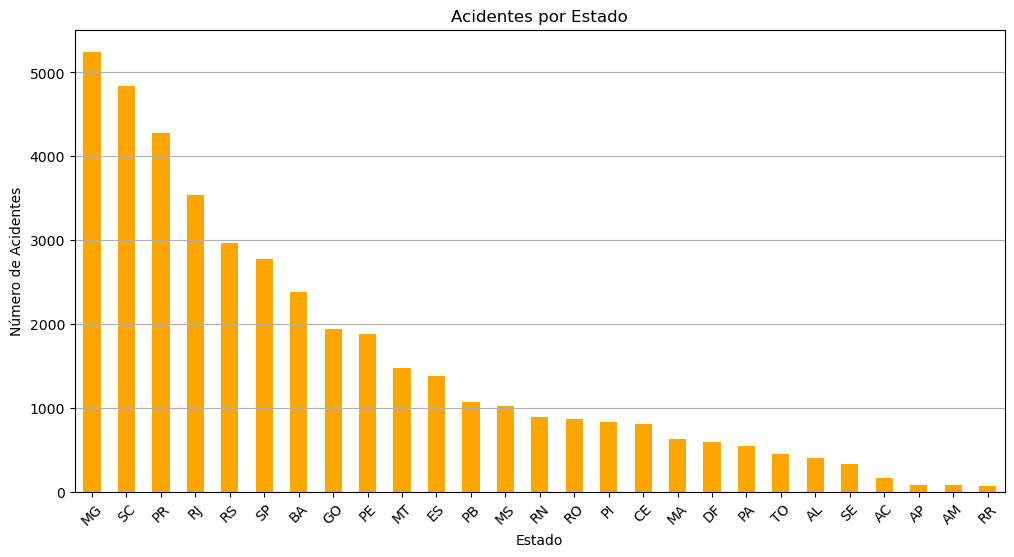

In [431]:
acidentes_por_estado = df_novo_geral_3['Estado'].value_counts()
plt.figure(figsize=(12, 6))
acidentes_por_estado.plot(kind='bar', color='orange')
plt.title('Acidentes por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [432]:
# Criando um novo DataFrame filtrando apenas as linhas onde o estado é 'SP'
novo_dataframe_sp = df_novo_geral_3[df_novo_geral_3['Estado'] == 'SP']

In [433]:
novo_dataframe_sp.isnull().sum()

Identificador do acidente    0
Data                         0
Dia da semana                0
Horário                      0
Estado                       0
BR                           5
km                           5
Município                    0
Causa do acidente            0
Tipo do acidente             0
Gravidade do acidente        0
Fase do dia                  0
Sentido da via               0
Condição do tempo            0
Tipo de pista                0
Traçado da via               0
uso_solo                     0
Número de passageiros        0
Número de cavaleiro          0
Número de condutor           0
Número de pedestre           0
dtype: int64

In [434]:
novo_dataframe_sp.to_csv('acidentes_geral_sp.csv', encoding = 'latin-1', sep = ';')
novo_condutor_sp.to_csv('acidentes_condutores_sp.csv', encoding = 'latin-1', sep = ';')


In [435]:
df_acidentes_geral_sp = pd.read_csv('acidentes_geral_sp.csv', encoding = 'latin-1', sep = ';')


In [436]:
df_acidentes_condutores_sp = pd.read_csv('acidentes_condutores_sp.csv', encoding = 'latin-1', sep = ';')

In [437]:
df_acidentes_geral_sp

,Unnamed: 0,Identificador do acidente,Data,Dia da semana,Horário,Estado,BR,km,Município,Causa do acidente,Tipo do acidente,Gravidade do acidente,Fase do dia,Sentido da via,Condição do tempo,Tipo de pista,Traçado da via,uso_solo,Número de passageiros,Número de cavaleiro,Número de condutor,Número de pedestre
0,10,571786,2024-01-01,segunda-feira,03:00:00,SP,101.0,28.4,UBATUBA,Condutor Dormindo,Colisão com objeto,Com Vítimas Feridas,Plena Noite,Crescente,Ensolarado,Simples,Reta,Rural,0,0,1,0
1,14,571790,2024-01-01,segunda-feira,02:50:00,SP,101.0,41.0,UBATUBA,Reação tardia ou ineficiente do condutor,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Ensolarado,Simples,Curva,Rural,0,0,2,0
2,82,571867,2024-01-01,segunda-feira,12:20:00,SP,116.0,161.0,JACAREI,Ausência de reação do condutor,Colisão com objeto,Com Vítimas Feridas,Pleno dia,Decrescente,Ensolarado,Múltipla,Reta,Rural,1,0,1,0
3,86,571871,2024-01-01,segunda-feira,13:00:00,SP,116.0,90.6,PINDAMONHANGABA,Pedestre cruzava a pista fora da faixa,Atropelamento de Pedestre,Com Vítimas Fatais,Pleno dia,Crescente,Ensolarado,Dupla,Reta,Rural,0,0,1,1
4,87,571873,2024-01-01,segunda-feira,13:20:00,SP,116.0,273.0,EMBU DAS ARTES,Velocidade Incompatível,Colisão lateral mesmo sentido,Com Vítimas Feridas,Pleno dia,Crescente,Ensolarado,Dupla,Reta,Rural,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,41381,618516,2024-07-05,sexta-feira,14:40:00,SP,381.0,36.0,ATIBAIA,Ausência de reação do condutor,Engavetamento,Com Vítimas Feridas,Pleno dia,Crescente,Ensolarado,Dupla,Reta,Urbano,0,0,2,0
2768,41411,619255,2024-05-30,quinta-feira,02:15:00,SP,116.0,54.1,LORENA,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Plena Noite,Crescente,Ensolarado,Dupla,Reta,Rural,0,0,1,0
2769,41434,619576,2024-03-14,quinta-feira,22:20:00,SP,153.0,59.0,SAO JOSE DO RIO PRETO,Pedestre cruzava a pista fora da faixa,Atropelamento de Pedestre,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Dupla,Reta;Declive,Urbano,0,0,1,1
2770,41472,620513,2024-07-30,terça-feira,12:50:00,SP,381.0,41.5,ATIBAIA,Demais falhas mecânicas ou elétricas,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Chuvoso,Múltipla,Reta,Urbano,0,0,2,0


In [438]:
df_acidentes_condutores_sp 

,Unnamed: 0,Identificador do acidente,Identificador do condutor,Estado,Identificador do veículo,Tipo de veículo,Marca do veículo,Envolvido,Estado físico do condutor,Idade,Gênero
0,17,571786,1269062,SP,1018282,Motocicleta,YAMAHA/FAZER YS250,Condutor,Lesões Leves,41,Masculino
1,27,571790,1269058,SP,1018280,Automóvel,FIAT/ARGO DRIVE 1.0,Condutor,Ileso,32,Feminino
2,28,571790,1271025,SP,1018281,Automóvel,Não Informado,Condutor,Não Informado,41,Não Informado
3,199,571867,1269372,SP,1018485,Automóvel,FIAT/PUNTO ESSENCE 1.6,Condutor,Lesões Graves,47,Masculino
4,209,571871,1269410,SP,1018515,Automóvel,HYUNDAI/HB20S 10M VISION,Condutor,Ileso,42,Masculino
...,...,...,...,...,...,...,...,...,...,...,...
4643,99576,619576,1386570,SP,1110149,Automóvel,FIAT/UNO MILLE FIRE,Condutor,Ileso,36,Feminino
4644,99664,620513,1388721,SP,1111934,Caminhonete,FIAT/STRADA HD WK CC E,Condutor,Lesões Leves,30,Masculino
4645,99665,620513,1388720,SP,1111933,Caminhonete,FIAT/STRADA ADVENT FLEX,Condutor,Ileso,53,Masculino
4646,99830,621574,1391534,SP,1114104,Caminhão-trator,SCANIA/P 340 A4X2,Condutor,Lesões Leves,31,Masculino


In [439]:
#A maioria dos condutores envolvido em acidentes são do sexo masculino.
df_acidentes_condutores_sp['Gênero'].value_counts()

Gênero
Masculino        3770
Feminino          535
Não Informado     343
Name: count, dtype: int64

In [494]:
df_acidentes_condutores_sp['Idade'].value_counts().head(50)

Idade
41    480
28    130
39    130
26    129
35    129
43    128
29    125
33    121
24    117
36    115
47    114
42    113
32    111
37    109
30    109
27    108
25    108
40    107
38    107
31    106
44    105
45    104
34     99
22     95
48     93
46     90
23     88
49     85
21     81
53     75
52     71
50     65
56     64
54     59
51     59
20     58
55     56
58     56
60     52
57     52
59     44
61     37
64     36
62     36
63     35
68     30
67     28
19     26
65     24
70     19
Name: count, dtype: int64

In [441]:
#A maioria dos acidentes envolvem automóveis e motocicletas.
df_acidentes_condutores_sp['Tipo de veículo'].value_counts().head(10)

Tipo de veículo
Automóvel          1770
Motocicleta        1236
Caminhão-trator     445
Caminhonete         357
Caminhão            343
Camioneta           148
Motoneta            107
Utilitário           75
Bicicleta            74
Ônibus               56
Name: count, dtype: int64

In [442]:
#Guarulhos é o município que mais tem acidentes no estado de São Paulo.
df_acidentes_geral_sp['Município'].value_counts().head(50)

Município
GUARULHOS                531
SAO JOSE DOS CAMPOS      195
SAO PAULO                193
UBATUBA                  151
CAJATI                   141
TAUBATE                  105
ATIBAIA                  103
SAO JOSE DO RIO PRETO    101
MAIRIPORA                 96
EMBU DAS ARTES            94
MIRACATU                  82
BARRA DO TURVO            77
ITAPECERICA DA SERRA      74
PINDAMONHANGABA           66
JACAREI                   63
CACAPAVA                  49
REGISTRO                  48
SAO LOURENCO DA SERRA     44
JUQUITIBA                 41
GUARATINGUETA             39
ARUJA                     37
APARECIDA                 31
LORENA                    31
BRAGANCA PAULISTA         29
SANTA ISABEL              24
VARGEM                    22
JACUPIRANGA               20
JOSE BONIFACIO            18
LAVRINHAS                 17
ROSEIRA                   17
JUQUIA                    15
NOVA GRANADA              14
TABOAO DA SERRA           14
BADY BASSITT              13
CACH

In [443]:
#A BR 116 é a que mais tem acidentes no estado de São Paulo
df_acidentes_geral_sp['BR'].value_counts().head(50)

BR
116.0    1951
381.0     390
153.0     240
101.0     150
459.0      18
488.0      12
262.0       5
158.0       1
Name: count, dtype: int64

In [444]:
df_acidentes_geral_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 2772 non-null   int64  
 1   Identificador do acidente  2772 non-null   int64  
 2   Data                       2772 non-null   object 
 3   Dia da semana              2772 non-null   object 
 4   Horário                    2772 non-null   object 
 5   Estado                     2772 non-null   object 
 6   BR                         2767 non-null   float64
 7   km                         2767 non-null   float64
 8   Município                  2772 non-null   object 
 9   Causa do acidente          2772 non-null   object 
 10  Tipo do acidente           2772 non-null   object 
 11  Gravidade do acidente      2772 non-null   object 
 12  Fase do dia                2772 non-null   object 
 13  Sentido da via             2772 non-null   objec

In [445]:
# Converter a coluna de datas para datetime
df_acidentes_geral_sp['Data'] = pd.to_datetime(df_acidentes_geral_sp['Data'])

# Extrair o mês
df_acidentes_geral_sp['mes'] = df_acidentes_geral_sp['Data'].dt.month

# 3. Contar o número de acidentes por mês
acidentes_por_mes = df_acidentes_geral_sp['mes'].value_counts().sort_index()


In [446]:
#Neste dados só temos informações de janeiro a julho de 2024. Todos os meses tem mais ou menos a mesma quantidade de acidentes.
acidentes_por_mes

mes
1    405
2    358
3    397
4    385
5    412
6    402
7    413
Name: count, dtype: int64

In [447]:
#A maior parte dos acidentes acontecem durante o amanhecer e pleno dia.
df_acidentes_geral_sp['Fase do dia'].value_counts().head(50)


Fase do dia
Pleno dia      1539
Plena Noite     931
Amanhecer       159
Anoitecer       143
Name: count, dtype: int64

C:\Users\leand\AppData\Local\Temp\ipykernel_18656\4050883396.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Idade', y='Gênero', data=df_acidentes_condutores_sp, palette='Set2')


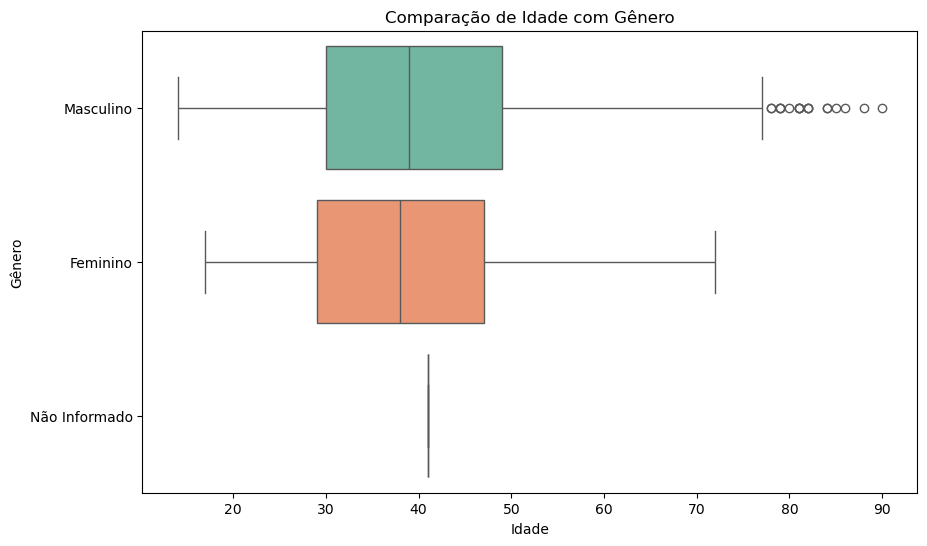

In [448]:
# Criando um gráfico de violino ou boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Idade', y='Gênero', data=df_acidentes_condutores_sp, palette='Set2')
plt.title('Comparação de Idade com Gênero')
plt.xlabel('Idade')
plt.ylabel('Gênero')
plt.show()

In [449]:
df_acidentes_geral_sp.columns


Index(['Unnamed: 0', 'Identificador do acidente', 'Data', 'Dia da semana',
       'Horário', 'Estado', 'BR', 'km', 'Município', 'Causa do acidente',
       'Tipo do acidente', 'Gravidade do acidente', 'Fase do dia',
       'Sentido da via', 'Condição do tempo', 'Tipo de pista',
       'Traçado da via', 'uso_solo', 'Número de passageiros',
       'Número de cavaleiro', 'Número de condutor', 'Número de pedestre',
       'mes'],
      dtype='object')

In [450]:
#Colisão traseira se destaca entre os tipos de acidente
df_acidentes_geral_sp['Tipo do acidente'].value_counts()

Tipo do acidente
Colisão traseira                  707
Colisão lateral mesmo sentido     430
Tombamento                        301
Colisão com objeto                286
Saída de leito carroçável         251
Queda de ocupante de veículo      189
Atropelamento de Pedestre         131
Colisão transversal               129
Engavetamento                      99
Incêndio                           80
Capotamento                        78
Colisão frontal                    39
Atropelamento de Animal            18
Eventos atípicos                   16
Colisão lateral sentido oposto     13
Derramamento de carga               4
Sinistro pessoal de trânsito        1
Name: count, dtype: int64

In [451]:
#As causas mais comuns de acidentes são reação tardia ou ineficiente do condutor e ausência de reação do condutor.
df_acidentes_geral_sp['Causa do acidente'].value_counts()

Causa do acidente
Reação tardia ou ineficiente do condutor                                        758
Ausência de reação do condutor                                                  502
Manobra de mudança de faixa                                                     175
Condutor deixou de manter distância do veículo da frente                        156
Trafegar com motocicleta (ou similar) entre as faixas                           139
Acessar a via sem observar a presença dos outros veículos                       133
Demais falhas mecânicas ou elétricas                                            131
Velocidade Incompatível                                                          94
Ingestão de álcool pelo condutor                                                 81
Avarias e/ou desgaste excessivo no pneu                                          62
Condutor Dormindo                                                                52
Chuva                                                     

In [452]:
#Com vítimas feridas, destacam-se em relação ao sem vítimas e os fatais.
df_acidentes_geral_sp['Gravidade do acidente'].value_counts()

Gravidade do acidente
Com Vítimas Feridas    2241
Sem Vítimas             405
Com Vítimas Fatais      126
Name: count, dtype: int64

In [453]:
#Grande parte acontece em condições meteorológica normal.
df_acidentes_geral_sp['Condição do tempo'].value_counts()


Condição do tempo
Ensolarado          1817
Nublado              484
Chuvoso              400
Não Informado         33
Nevoeiro/Neblina      30
Vento                  7
Neve                   1
Name: count, dtype: int64

In [454]:
#Por incrível que pareça, grande parte do acidentes ocorrem em pistas duplas e múltiplas.
df_acidentes_geral_sp['Tipo de pista'].value_counts()


Tipo de pista
Dupla       1600
Múltipla     710
Simples      462
Name: count, dtype: int64

In [455]:
#Bem distribuído
df_acidentes_geral_sp['uso_solo'].value_counts()


uso_solo
Urbano    1426
Rural     1346
Name: count, dtype: int64

In [456]:
df_acidentes_geral_sp['Sentido da via'].value_counts()


Sentido da via
Crescente        1441
Decrescente      1326
Não Informado       5
Name: count, dtype: int64

In [457]:
df_acidentes_geral_sp['Traçado da via'].value_counts().head(50)


Traçado da via
Reta                                                             1736
Curva                                                             276
Reta;Aclive                                                       142
Curva;Declive                                                     125
Reta;Declive                                                      119
Reta;Em Obras                                                      55
Curva;Aclive                                                       54
Interseção de Vias                                                 37
Declive                                                            35
Aclive                                                             32
Reta;Interseção de Vias                                            28
Rotatória                                                          25
Reta;Retorno Regulamentado                                         14
Retorno Regulamentado                                               9
Ponte

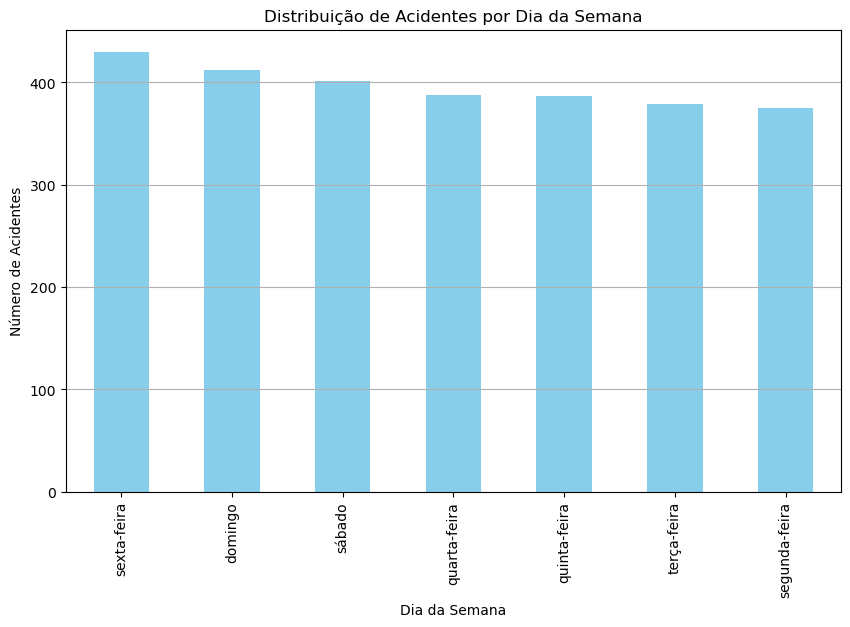

In [458]:
# Contar acidentes por dia da semana
acidentes_por_dia = df_acidentes_geral_sp['Dia da semana'].value_counts()

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
acidentes_por_dia.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Acidentes por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

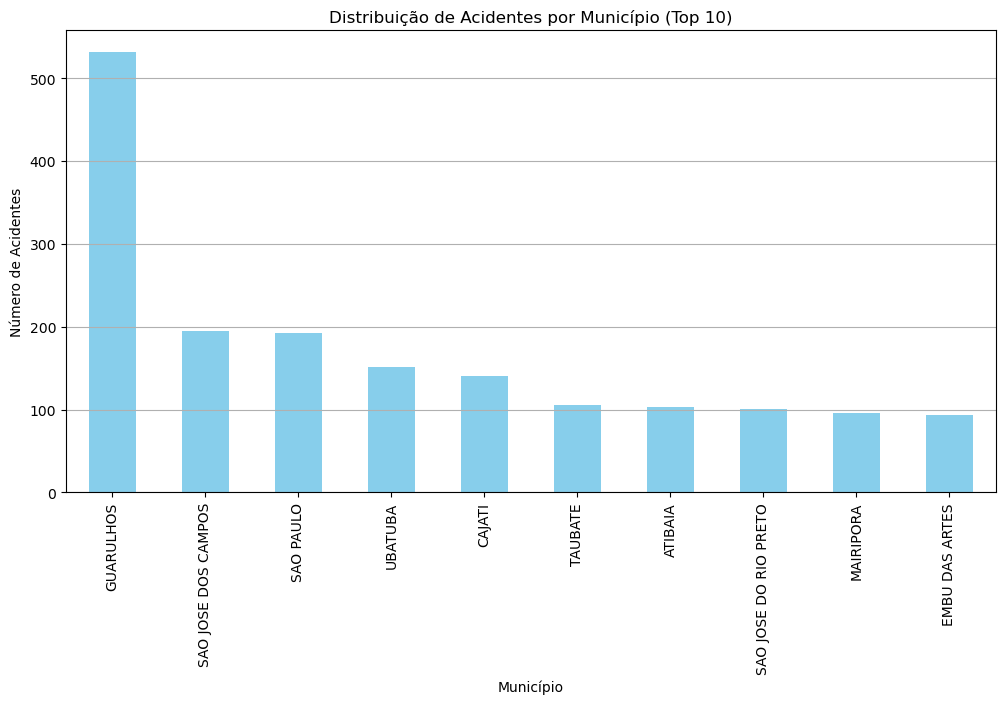

In [459]:
# Contar acidentes por Município
acidentes_por_municipio = df_acidentes_geral_sp['Município'].value_counts().head(10)  # Para mostrar os 10 primeiros

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
acidentes_por_municipio.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Acidentes por Município (Top 10)')
plt.xlabel('Município')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

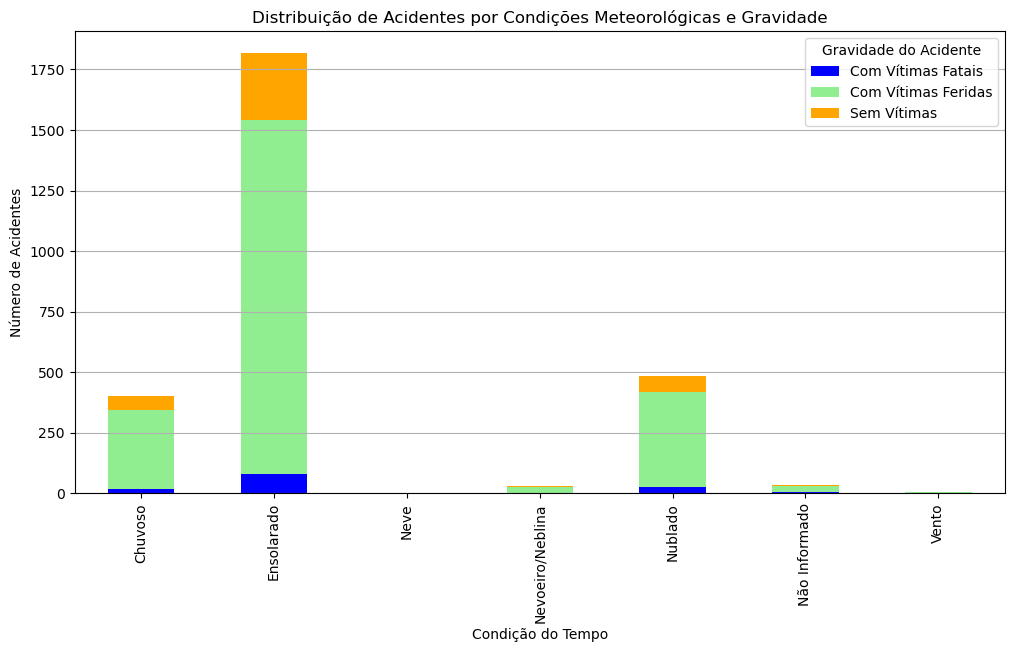

In [492]:
# Contar acidentes por condição do tempo e gravidade
contagem = df_acidentes_geral_sp.groupby(['Condição do tempo', 'Gravidade do acidente']).size().unstack().head(10) 

# Plotar gráfico de barras
contagem.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'lightgreen', 'orange', 'red'])
plt.title('Distribuição de Acidentes por Condições Meteorológicas e Gravidade')
plt.xlabel('Condição do Tempo')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=90)
plt.legend(title='Gravidade do Acidente')
plt.grid(axis='y')
plt.show()

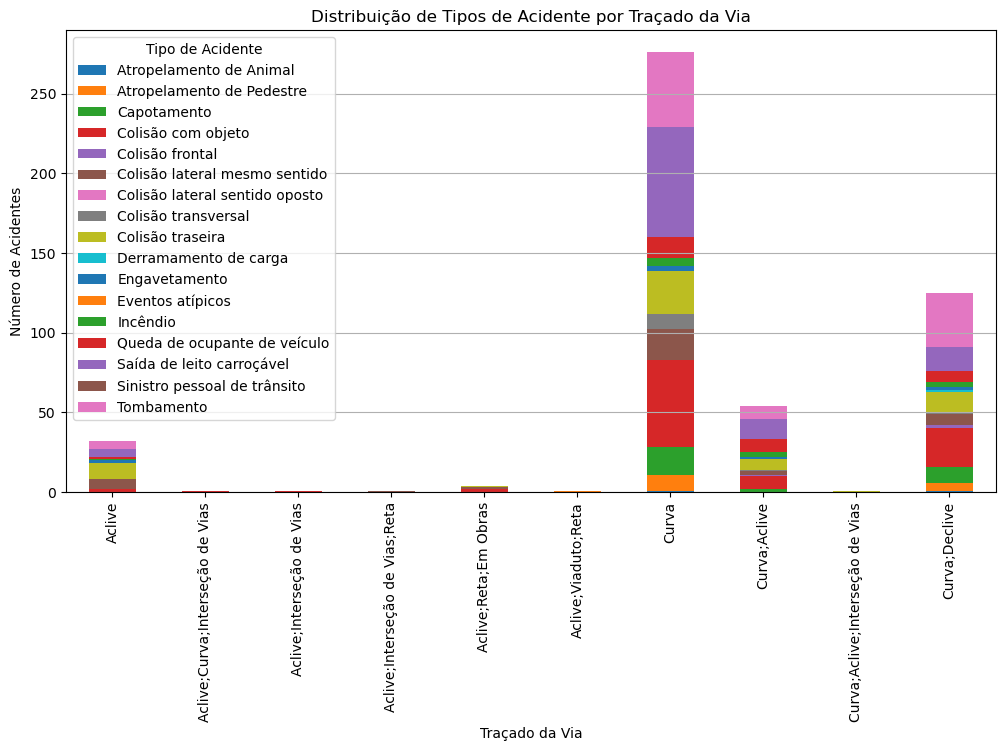

In [490]:
# Contar acidentes por tipo de traçado da via e tipo de acidente
contagem = df_acidentes_geral_sp.groupby(['Traçado da via', 'Tipo do acidente']).size().unstack().head(10) 

# Plotar gráfico de barras
contagem.plot(kind='bar', stacked=True, figsize=(12, 6), color=plt.cm.tab10.colors)
plt.title('Distribuição de Tipos de Acidente por Traçado da Via')
plt.xlabel('Traçado da Via')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=90)
plt.legend(title='Tipo de Acidente')
plt.grid(axis='y')
plt.show()

In [462]:
# Suponha que você tenha um DataFrame df
df_acidentes_geral_sp['Horário'] = pd.to_datetime(df_acidentes_geral_sp['Horário'], format='%H:%M:%S')  # Para "HH:MM:SS"

In [463]:
df_acidentes_geral_sp.head()

,Unnamed: 0,Identificador do acidente,Data,Dia da semana,Horário,Estado,BR,km,Município,Causa do acidente,Tipo do acidente,Gravidade do acidente,Fase do dia,Sentido da via,Condição do tempo,Tipo de pista,Traçado da via,uso_solo,Número de passageiros,Número de cavaleiro,Número de condutor,Número de pedestre,mes
0,10,571786,2024-01-01,segunda-feira,1900-01-01 03:00:00,SP,101.0,28.4,UBATUBA,Condutor Dormindo,Colisão com objeto,Com Vítimas Feridas,Plena Noite,Crescente,Ensolarado,Simples,Reta,Rural,0,0,1,0,1
1,14,571790,2024-01-01,segunda-feira,1900-01-01 02:50:00,SP,101.0,41.0,UBATUBA,Reação tardia ou ineficiente do condutor,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Ensolarado,Simples,Curva,Rural,0,0,2,0,1
2,82,571867,2024-01-01,segunda-feira,1900-01-01 12:20:00,SP,116.0,161.0,JACAREI,Ausência de reação do condutor,Colisão com objeto,Com Vítimas Feridas,Pleno dia,Decrescente,Ensolarado,Múltipla,Reta,Rural,1,0,1,0,1
3,86,571871,2024-01-01,segunda-feira,1900-01-01 13:00:00,SP,116.0,90.6,PINDAMONHANGABA,Pedestre cruzava a pista fora da faixa,Atropelamento de Pedestre,Com Vítimas Fatais,Pleno dia,Crescente,Ensolarado,Dupla,Reta,Rural,0,0,1,1,1
4,87,571873,2024-01-01,segunda-feira,1900-01-01 13:20:00,SP,116.0,273.0,EMBU DAS ARTES,Velocidade Incompatível,Colisão lateral mesmo sentido,Com Vítimas Feridas,Pleno dia,Crescente,Ensolarado,Dupla,Reta,Rural,0,0,2,0,1


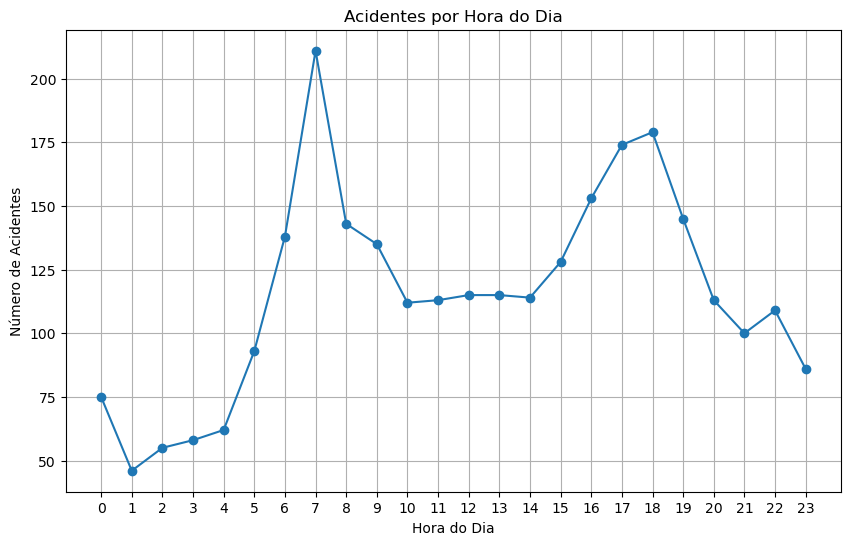

KeyError: 'Hora'

<Figure size 1000x600 with 0 Axes>

In [464]:
df_df_gráfico = pd.DataFrame(df_acidentes_geral_sp)

# 1. Converter a coluna 'Horário' para o tipo datetime
df_df_gráfico['Horário'] = pd.to_datetime(df_df_gráfico['Horário'], format='%H:%M:%S', errors='coerce')

# 2. Extrair a hora
df_df_gráfico['Hora'] = df_df_gráfico['Horário'].dt.hour

# 3. Contar o número de acidentes por hora
acidentes_por_hora = df_df_gráfico['Hora'].value_counts().sort_index()

# 4. Plotar o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(acidentes_por_hora.index, acidentes_por_hora.values, marker='o', linestyle='-')
plt.title('Acidentes por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Acidentes')
plt.xticks(range(24))  # Mostra todas as horas do dia
plt.grid()
plt.show()

# 5. Plotar o histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['Hora'], bins=24, kde=False)
plt.title('Distribuição de Acidentes por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Acidentes')
plt.xticks(range(24))  # Mostra todas as horas do dia
plt.grid()
plt.show()

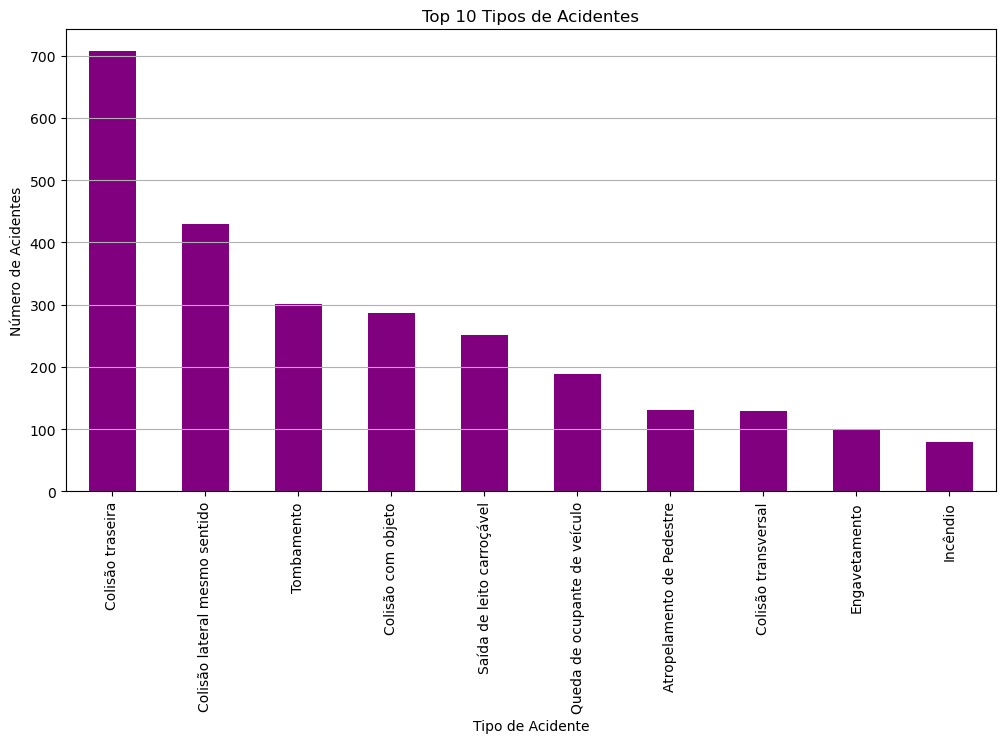

In [465]:
tipos_acidentes = df_acidentes_geral_sp['Tipo do acidente'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
tipos_acidentes.plot(kind='bar', color='purple')
plt.title('Top 10 Tipos de Acidentes')
plt.xlabel('Tipo de Acidente')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

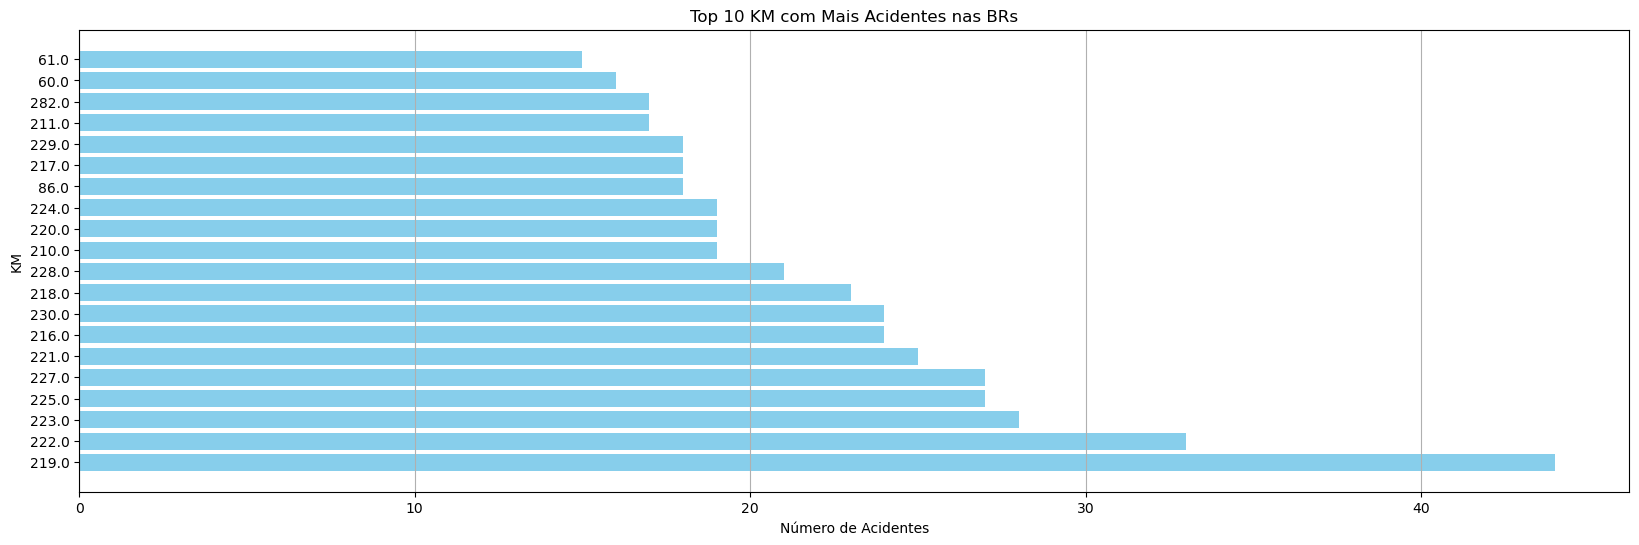

In [467]:
# 1. Contar o número de acidentes por km
acidentes_por_km = df_acidentes_geral_sp.groupby('km').size().reset_index(name='Número de Acidentes')

# 2. Filtrar para as 10 principais km com mais acidentes
top_10_acidentes = acidentes_por_km.nlargest(20, 'Número de Acidentes')

# 3. Criar o gráfico de barras com km no eixo vertical
plt.figure(figsize=(20, 6))
plt.barh(top_10_acidentes['km'].astype(str), top_10_acidentes['Número de Acidentes'], color='skyblue')
plt.title('Top 10 KM com Mais Acidentes nas BRs')
plt.xlabel('Número de Acidentes')
plt.ylabel('KM')
plt.grid(axis='x')
plt.show()

In [469]:
df_acidentes_condutores_sp.columns

Index(['Unnamed: 0', 'Identificador do acidente', 'Identificador do condutor',
       'Estado', 'Identificador do veículo', 'Tipo de veículo',
       'Marca do veículo', 'Envolvido', 'Estado físico do condutor', 'Idade',
       'Gênero'],
      dtype='object')

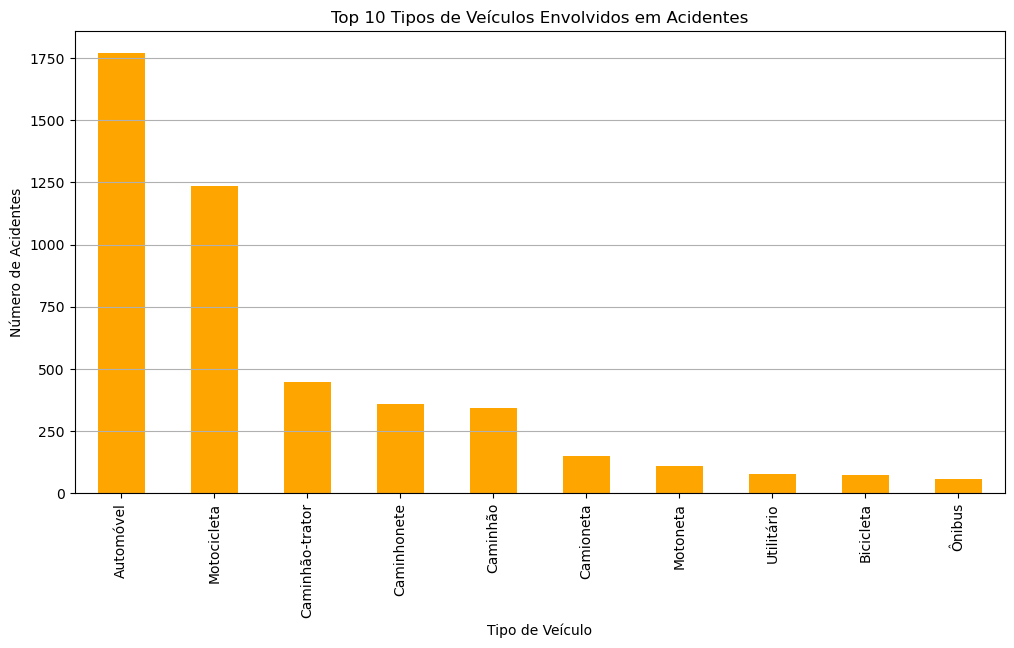

In [471]:
tipos_veiculo = df_acidentes_condutores_sp['Tipo de veículo'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
tipos_veiculo.plot(kind='bar', color='orange')
plt.title('Top 10 Tipos de Veículos Envolvidos em Acidentes')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

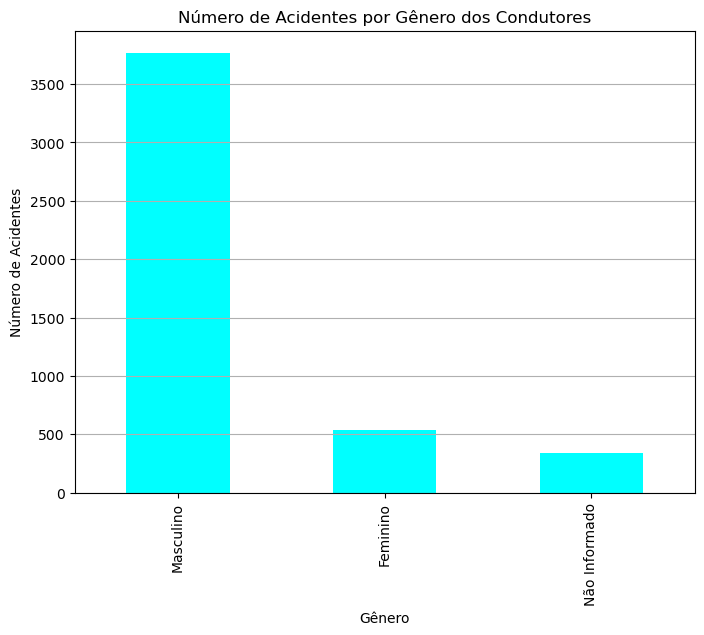

In [473]:
genero_condutores = df_acidentes_condutores_sp['Gênero'].value_counts()
plt.figure(figsize=(8, 6))
genero_condutores.plot(kind='bar', color='cyan')
plt.title('Número de Acidentes por Gênero dos Condutores')
plt.xlabel('Gênero')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

C:\Users\leand\AppData\Local\Temp\ipykernel_18656\901633100.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acidentes_por_idade_genero = df_acidentes_condutores_sp.groupby(['Faixa Etária', 'Gênero']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

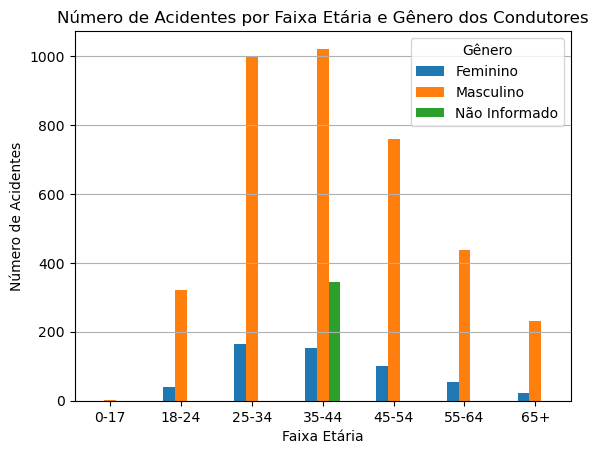

In [475]:
# 1. Criar faixas de idade
faixas_idade = [0, 17, 24, 34, 44, 54, 64, 100]
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_acidentes_condutores_sp['Faixa Etária'] = pd.cut(df_acidentes_condutores_sp['Idade'], bins=faixas_idade, labels=labels, right=False)

# 2. Agrupar os dados por faixa de idade e gênero
acidentes_por_idade_genero = df_acidentes_condutores_sp.groupby(['Faixa Etária', 'Gênero']).size().unstack(fill_value=0)

# 3. Plotar o gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
acidentes_por_idade_genero.plot(kind='bar', stacked=False)
plt.title('Número de Acidentes por Faixa Etária e Gênero dos Condutores')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=0)
plt.legend(title='Gênero')
plt.grid(axis='y')
plt.show()

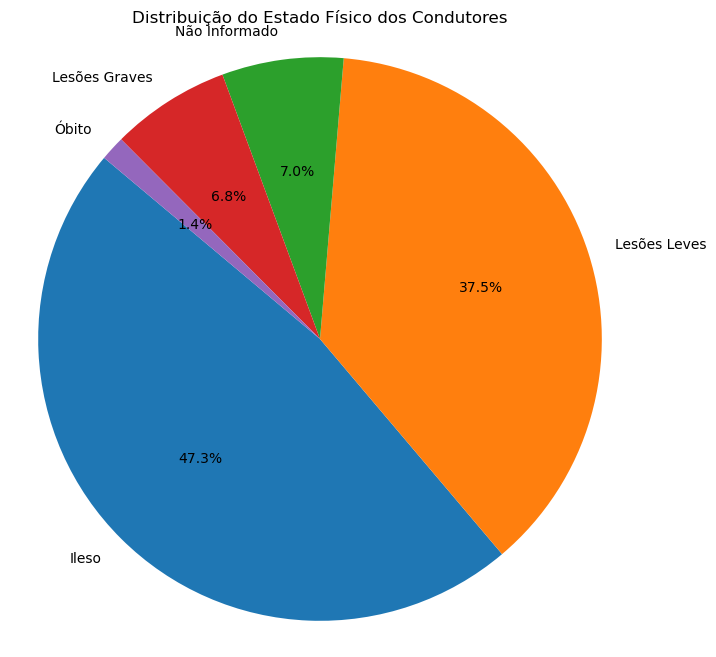

In [476]:
estado_fisico = df_acidentes_condutores_sp['Estado físico do condutor'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(estado_fisico, labels=estado_fisico.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição do Estado Físico dos Condutores')
plt.axis('equal')  # Para que o gráfico seja um círculo
plt.show()

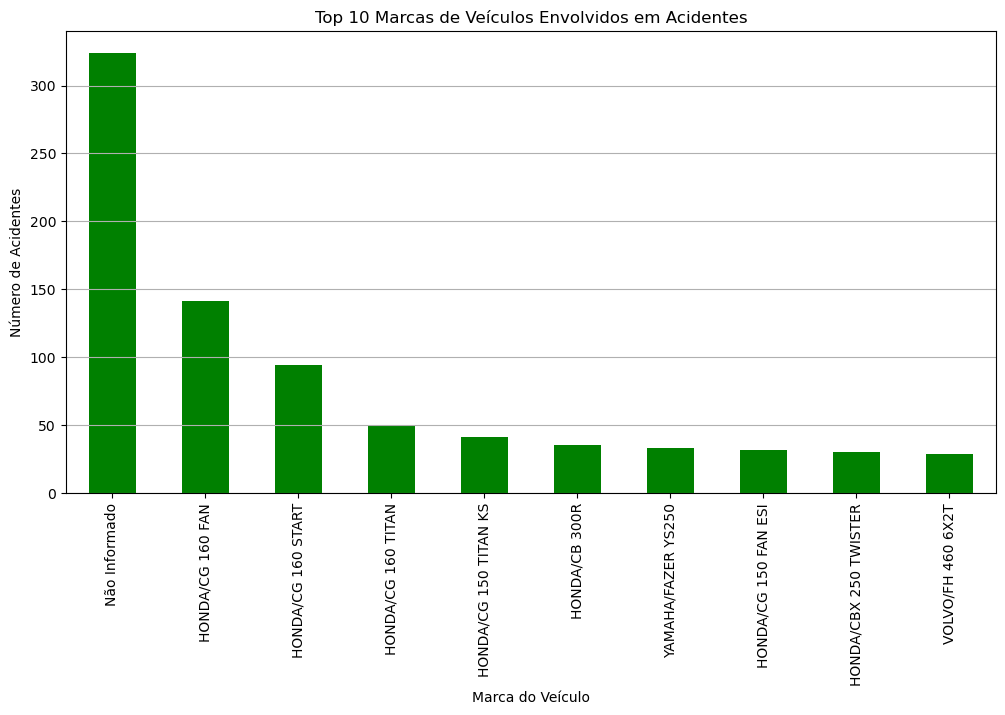

In [478]:
marcas_veiculo = df_acidentes_condutores_sp['Marca do veículo'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
marcas_veiculo.plot(kind='bar', color='green')
plt.title('Top 10 Marcas de Veículos Envolvidos em Acidentes')
plt.xlabel('Marca do Veículo')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [480]:
df_acidentes_condutores_sp.head(5)


,Unnamed: 0,Identificador do acidente,Identificador do condutor,Estado,Identificador do veículo,Tipo de veículo,Marca do veículo,Envolvido,Estado físico do condutor,Idade,Gênero,Faixa Etária
0,17,571786,1269062,SP,1018282,Motocicleta,YAMAHA/FAZER YS250,Condutor,Lesões Leves,41,Masculino,35-44
1,27,571790,1269058,SP,1018280,Automóvel,FIAT/ARGO DRIVE 1.0,Condutor,Ileso,32,Feminino,25-34
2,28,571790,1271025,SP,1018281,Automóvel,Não Informado,Condutor,Não Informado,41,Não Informado,35-44
3,199,571867,1269372,SP,1018485,Automóvel,FIAT/PUNTO ESSENCE 1.6,Condutor,Lesões Graves,47,Masculino,45-54
4,209,571871,1269410,SP,1018515,Automóvel,HYUNDAI/HB20S 10M VISION,Condutor,Ileso,42,Masculino,35-44


In [481]:
df_acidentes_geral_sp.head(5)

,Unnamed: 0,Identificador do acidente,Data,Dia da semana,Horário,Estado,BR,km,Município,Causa do acidente,Tipo do acidente,Gravidade do acidente,Fase do dia,Sentido da via,Condição do tempo,Tipo de pista,Traçado da via,uso_solo,Número de passageiros,Número de cavaleiro,Número de condutor,Número de pedestre,mes
0,10,571786,2024-01-01,segunda-feira,1900-01-01 03:00:00,SP,101.0,28.4,UBATUBA,Condutor Dormindo,Colisão com objeto,Com Vítimas Feridas,Plena Noite,Crescente,Ensolarado,Simples,Reta,Rural,0,0,1,0,1
1,14,571790,2024-01-01,segunda-feira,1900-01-01 02:50:00,SP,101.0,41.0,UBATUBA,Reação tardia ou ineficiente do condutor,Colisão com objeto,Sem Vítimas,Plena Noite,Crescente,Ensolarado,Simples,Curva,Rural,0,0,2,0,1
2,82,571867,2024-01-01,segunda-feira,1900-01-01 12:20:00,SP,116.0,161.0,JACAREI,Ausência de reação do condutor,Colisão com objeto,Com Vítimas Feridas,Pleno dia,Decrescente,Ensolarado,Múltipla,Reta,Rural,1,0,1,0,1
3,86,571871,2024-01-01,segunda-feira,1900-01-01 13:00:00,SP,116.0,90.6,PINDAMONHANGABA,Pedestre cruzava a pista fora da faixa,Atropelamento de Pedestre,Com Vítimas Fatais,Pleno dia,Crescente,Ensolarado,Dupla,Reta,Rural,0,0,1,1,1
4,87,571873,2024-01-01,segunda-feira,1900-01-01 13:20:00,SP,116.0,273.0,EMBU DAS ARTES,Velocidade Incompatível,Colisão lateral mesmo sentido,Com Vítimas Feridas,Pleno dia,Crescente,Ensolarado,Dupla,Reta,Rural,0,0,2,0,1
